# Montaje Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerías

## Instalación de Librerías

In [ ]:
!pip install scikeras

In [ ]:
#!pip install keras==2.12.0
#!pip uninstall tensorflow
#!pip install tensorflow==2.12.0

In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow --ignore-installed

## Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from scipy.stats import shapiro
from scipy.stats import norm, lognorm, gamma, beta
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve

# Datos

## Importación de Datos

In [ ]:
ruta = '/content/drive/MyDrive/TOG/IDI III/Datos/'
df = pd.read_excel(ruta+"datos_klines.xlsx")

## Visualización y Descripción de 'data'

In [ ]:
df.head()

1672531200000  1195.67  1196.21  1192.21  1193.53   5479.854  \
0  1672534800000  1193.53  1195.73  1193.41  1195.38  2738.3979   
1  1672538400000  1195.38  1196.10  1193.51  1194.86  2429.3965   
2  1672542000000  1194.85  1194.85  1191.21  1193.47  5148.8046   
3  1672545600000  1193.47  1193.47  1190.22  1192.34  4333.7378   
4  1672549200000  1192.34  1193.99  1192.25  1193.87  1544.9423   

   1672534799999  6544285.047596  6158  2076.7402  2479779.030506  0  0.1  
0  1672538399999    3.271612e+06  3308  1254.0049    1.498065e+06  0    1  
1  1672541999999    2.902240e+06  3194   979.2334    1.169702e+06  0    0  
2  1672545599999    6.141005e+06  4962  1744.5012    2.080476e+06  0    0  
3  1672549199999    5.165866e+06  4161  1664.9285    1.984479e+06  0    0  
4  1672552799999    1.843229e+06  2125   731.0198    8.721530e+05  0    1

In [ ]:
df.columns = ['Open_time','Open','High','Low','Close',
                'Volume','Close_time','Quote_asset_volume',
                'Number_of_trades','Taker_buy_base_asset_volume',
                'Taker_buy_quote_asset_volume','Ignore','Response']

In [ ]:
df.head()

Open_time     Open     High      Low    Close     Volume  \
0  1672534800000  1193.53  1195.73  1193.41  1195.38  2738.3979   
1  1672538400000  1195.38  1196.10  1193.51  1194.86  2429.3965   
2  1672542000000  1194.85  1194.85  1191.21  1193.47  5148.8046   
3  1672545600000  1193.47  1193.47  1190.22  1192.34  4333.7378   
4  1672549200000  1192.34  1193.99  1192.25  1193.87  1544.9423   

      Close_time  Quote_asset_volume  Number_of_trades  \
0  1672538399999        3.271612e+06              3308   
1  1672541999999        2.902240e+06              3194   
2  1672545599999        6.141005e+06              4962   
3  1672549199999        5.165866e+06              4161   
4  1672552799999        1.843229e+06              2125   

   Taker_buy_base_asset_volume  Taker_buy_quote_asset_volume  Ignore  Response  
0                    1254.0049                  1.498065e+06       0         1  
1                     979.2334                  1.169702e+06       0         0  
2                    1744.5012                  2.080476e+06       0         0  
3                    1664.9285                  1.984479e+06       0         0  
4                     731.0198                  8.721530e+05       0         1

Información de 'data'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open_time                     7294 non-null   int64  
 1   Open                          7294 non-null   float64
 2   High                          7294 non-null   float64
 3   Low                           7294 non-null   float64
 4   Close                         7294 non-null   float64
 5   Volume                        7294 non-null   float64
 6   Close_time                    7294 non-null   int64  
 7   Quote_asset_volume            7294 non-null   float64
 8   Number_of_trades              7294 non-null   int64  
 9   Taker_buy_base_asset_volume   7294 non-null   float64
 10  Taker_buy_quote_asset_volume  7294 non-null   float64
 11  Ignore                        7294 non-null   int64  
 12  Response                      7294 non-null   int64  
dtypes: 

In [ ]:
df.describe()

Open_time         Open         High          Low        Close  \
count  7.294000e+03  7294.000000  7294.000000  7294.000000  7294.000000   
mean   1.685665e+12  1727.334127  1732.547254  1721.959687  1727.414138   
std    7.581900e+09   163.144044   163.416158   162.773578   163.027326   
min    1.672535e+12  1192.340000  1193.470000  1190.220000  1192.340000   
25%    1.679098e+12  1626.547500  1630.987500  1621.392500  1626.657500   
50%    1.685666e+12  1742.055000  1747.875000  1736.450000  1742.245000   
75%    1.692230e+12  1855.632500  1860.197500  1851.045000  1855.625000   
max    1.698793e+12  2130.000000  2141.300000  2120.350000  2129.230000   

              Volume    Close_time  Quote_asset_volume  Number_of_trades  \
count    7294.000000  7.294000e+03        7.294000e+03       7294.000000   
mean     4870.269150  1.685668e+12        8.094398e+06       6818.130244   
std      8140.481230  7.581900e+09        1.297646e+07       9562.160839   
min         0.000000  1.672538e+12        0.000000e+00          0.000000   
25%       603.524225  1.679102e+12        1.054621e+06       1381.250000   
50%      1999.630600  1.685669e+12        3.575419e+06       3884.500000   
75%      5902.946375  1.692233e+12        9.944292e+06       8374.000000   
max    138580.467400  1.698797e+12        2.110631e+08     196974.000000   

       Taker_buy_base_asset_volume  Taker_buy_quote_asset_volume  Ignore  \
count                  7294.000000                  7.294000e+03  7294.0   
mean                   2448.076130                  4.067363e+06     0.0   
std                    4109.057956                  6.543020e+06     0.0   
min                       0.000000                  0.000000e+00     0.0   
25%                     307.624425                  5.282185e+05     0.0   
50%                    1000.199550                  1.782572e+06     0.0   
75%                    2945.971675                  5.021180e+06     0.0   
max                   74834.918800                  1.139151e+08     0.0   

          Response  
count  7294.000000  
mean      0.502468  
std       0.500028  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

## Conversión 'unix'

In [ ]:
df['Open_time'] = pd.to_datetime(df['Open_time'], unit='ms', origin='unix')
df['Close_time'] = pd.to_datetime(df['Close_time'], unit='ms',origin='unix')

In [ ]:
df.head()

Open_time     Open     High      Low    Close     Volume  \
0 2023-01-01 01:00:00  1193.53  1195.73  1193.41  1195.38  2738.3979   
1 2023-01-01 02:00:00  1195.38  1196.10  1193.51  1194.86  2429.3965   
2 2023-01-01 03:00:00  1194.85  1194.85  1191.21  1193.47  5148.8046   
3 2023-01-01 04:00:00  1193.47  1193.47  1190.22  1192.34  4333.7378   
4 2023-01-01 05:00:00  1192.34  1193.99  1192.25  1193.87  1544.9423   

               Close_time  Quote_asset_volume  Number_of_trades  \
0 2023-01-01 01:59:59.999        3.271612e+06              3308   
1 2023-01-01 02:59:59.999        2.902240e+06              3194   
2 2023-01-01 03:59:59.999        6.141005e+06              4962   
3 2023-01-01 04:59:59.999        5.165866e+06              4161   
4 2023-01-01 05:59:59.999        1.843229e+06              2125   

   Taker_buy_base_asset_volume  Taker_buy_quote_asset_volume  Ignore  Response  
0                    1254.0049                  1.498065e+06       0         1  
1                     979.2334                  1.169702e+06       0         0  
2                    1744.5012                  2.080476e+06       0         0  
3                    1664.9285                  1.984479e+06       0         0  
4                     731.0198                  8.721530e+05       0         1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open_time                     7294 non-null   datetime64[ns]
 1   Open                          7294 non-null   float64       
 2   High                          7294 non-null   float64       
 3   Low                           7294 non-null   float64       
 4   Close                         7294 non-null   float64       
 5   Volume                        7294 non-null   float64       
 6   Close_time                    7294 non-null   datetime64[ns]
 7   Quote_asset_volume            7294 non-null   float64       
 8   Number_of_trades              7294 non-null   int64         
 9   Taker_buy_base_asset_volume   7294 non-null   float64       
 10  Taker_buy_quote_asset_volume  7294 non-null   float64       
 11  Ignore                        

## Análisis Exploratorio

Definición de los parámetros de los gráficos

In [ ]:
plt.rcParams.update({'font.size': 11, 'figure.figsize': (20, 13)})
plt.style.use('ggplot')

### ¿Cómo están distribuidos los datos?

array([[<Axes: title={'center': 'Open_time'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Close_time'}>,
        <Axes: title={'center': 'Quote_asset_volume'}>],
       [<Axes: title={'center': 'Number_of_trades'}>,
        <Axes: title={'center': 'Taker_buy_base_asset_volume'}>,
        <Axes: title={'center': 'Taker_buy_quote_asset_volume'}>,
        <Axes: title={'center': 'Ignore'}>],
       [<Axes: title={'center': 'Response'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

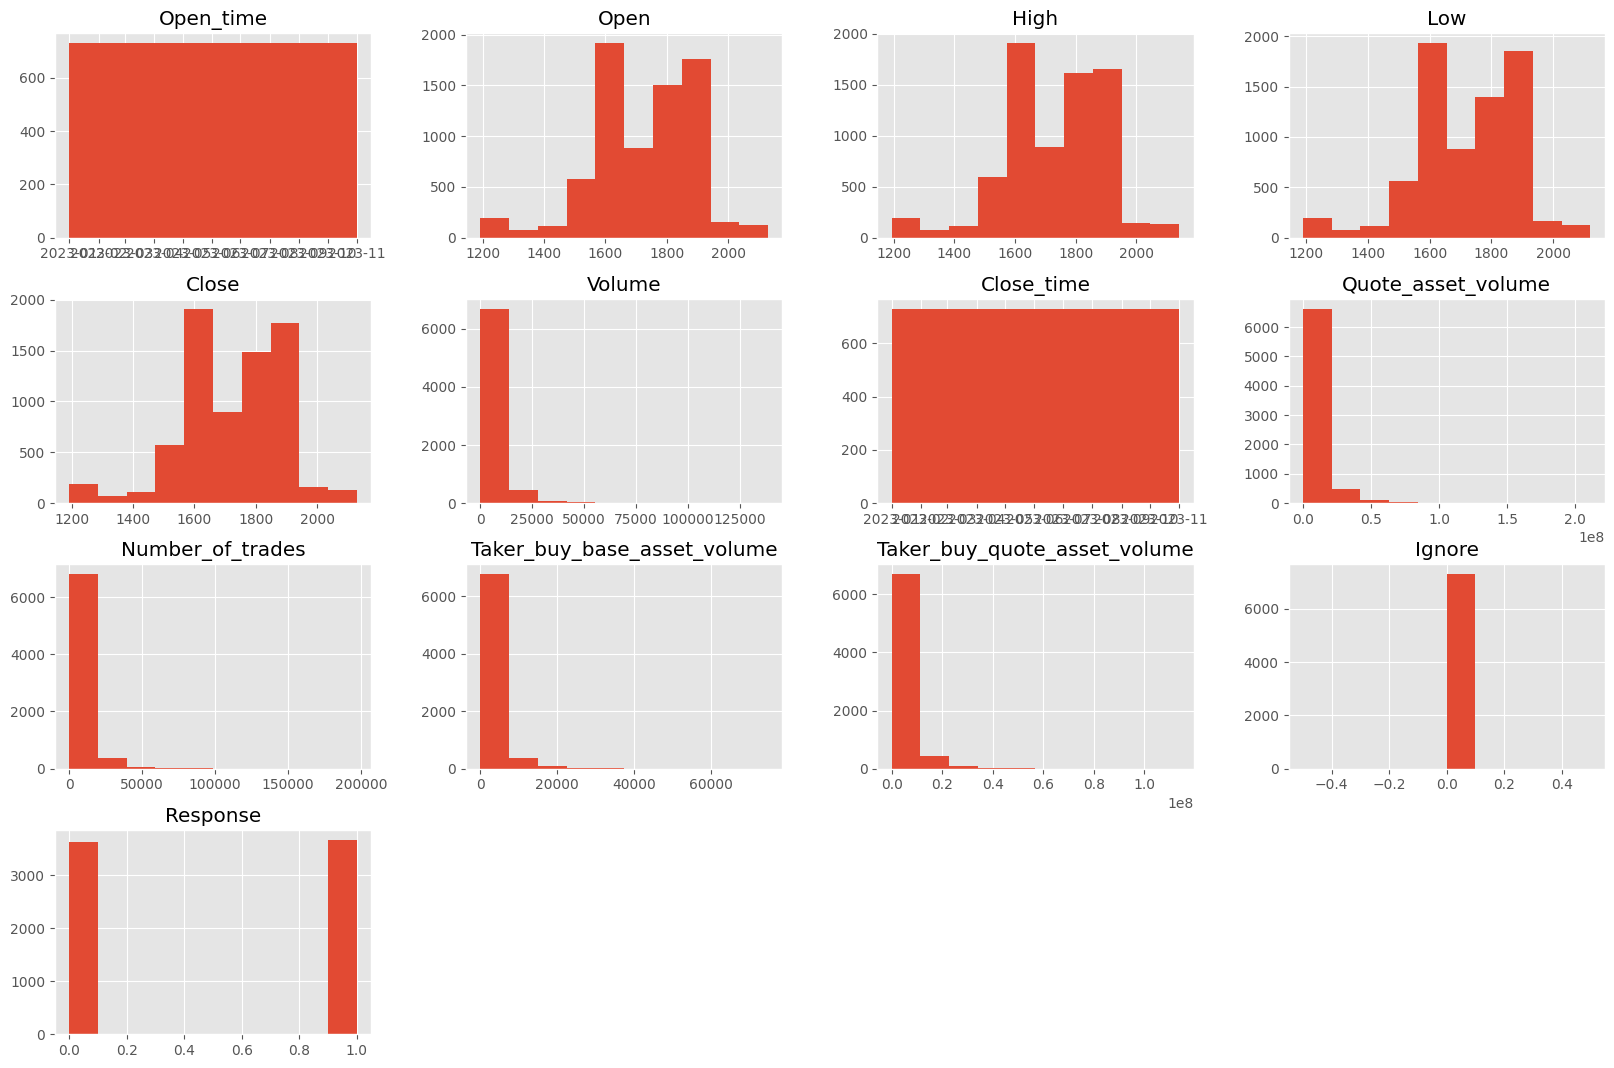

In [ ]:
df.hist()

Con la información que se tiene hasta el momento podemos determinar lo siguiente:
- 'Open_time' y 'Close_time' se comportan de la misma manera como pudiera esperarse ya que únicamente son "timestamps"
- 'Open' y 'Close',siendo valores de precio de apertura y cierre por hora, comparten la misma figura de su distribución. Esto es debido a que el precio de Cierre en la hora t será el mismo precio que el de apertura en el tiempo t+1
- Las distribuciones de 'High' y 'Low' son bastante parecidas pero se alcanza a percibir una diferencia alrededor de los valores de 1800 en el eje x
- 3 distribuciones son bastante similares (a simple vista no se encuentran diferencias significativas) 'Number of trades', 'Taker buy base asset volume', 'taker buy quote asset volume'
- La variable 'Ignore' siempre se encuentra en los mismos valores
- La variable de respuesta (subida o bajada de precio) presenta frecuencias similares

### Simetría y Curtosis

In [ ]:
df.skew()

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'skew'

In [ ]:
df.kurt()

### Visualizaciones

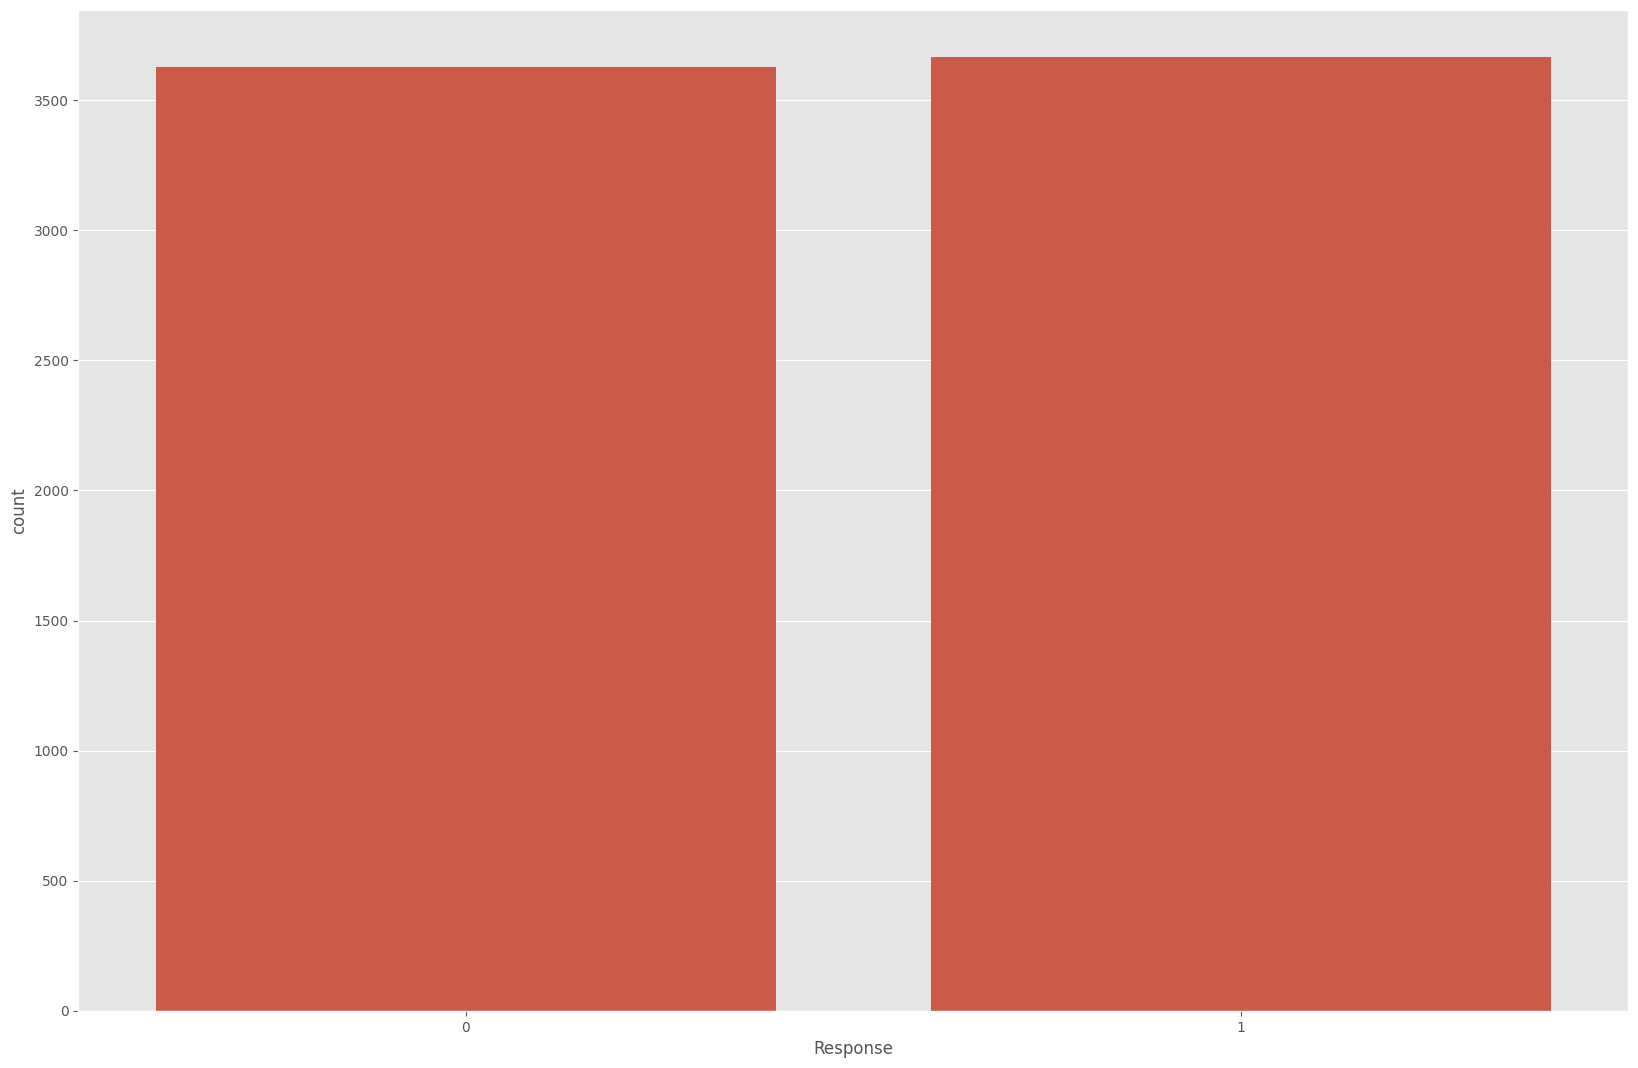

In [ ]:
sns.countplot(x='Response', data=df)
plt.show()

In [ ]:
respuestas = df[df['Response'].isin([0,1])]['Response'].value_counts()
respuestas

Response
1    3665
0    3629
Name: count, dtype: int64

Se puede visualizar variables altamente correlacionadas entre sí.

¿Cómo se comporta los precios a lo largo del tiempo?

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Open_time'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.show()

 ¿Cómo cambiaría las visualizaciones si agregaramos variables/características tomando en cuenta la fecha?

Dividiendo 'Open Time'

In [ ]:
df.set_index('Open_time', inplace = True)

Día de la Semana

In [ ]:
df['day_of_week'] = df.index.dayofweek

Hora del Día

In [ ]:
df['hour_of_day'] = df.index.hour

Mes

In [ ]:
df['month'] = df.index.month

In [ ]:
df.tail()

Open     High      Low    Close    Volume  \
Open_time                                                           
2023-10-31 19:00:00  1809.44  1815.00  1806.45  1811.58  226.0979   
2023-10-31 20:00:00  1811.27  1818.11  1809.65  1814.16  276.6025   
2023-10-31 21:00:00  1814.66  1814.66  1802.45  1806.75  258.5225   
2023-10-31 22:00:00  1806.61  1813.41  1805.20  1809.65   51.7500   
2023-10-31 23:00:00  1809.41  1816.86  1807.72  1815.27  108.3861   

                                 Close_time  Quote_asset_volume  \
Open_time                                                         
2023-10-31 19:00:00 2023-10-31 19:59:59.999       409135.147659   
2023-10-31 20:00:00 2023-10-31 20:59:59.999       501462.836595   
2023-10-31 21:00:00 2023-10-31 21:59:59.999       467864.215783   
2023-10-31 22:00:00 2023-10-31 22:59:59.999        93638.397150   
2023-10-31 23:00:00 2023-10-31 23:59:59.999       196404.539291   

                     Number_of_trades  Taker_buy_base_asset_volume  \
Open_time                                                            
2023-10-31 19:00:00               898                      88.8635   
2023-10-31 20:00:00               550                     100.9516   
2023-10-31 21:00:00               534                     175.2124   
2023-10-31 22:00:00               287                      24.5120   
2023-10-31 23:00:00               383                      53.3712   

                     Taker_buy_quote_asset_volume  Ignore  Response  \
Open_time                                                             
2023-10-31 19:00:00                 160850.341125       0         1   
2023-10-31 20:00:00                 183083.435573       0         1   
2023-10-31 21:00:00                 317190.740232       0         0   
2023-10-31 22:00:00                  44360.732930       0         1   
2023-10-31 23:00:00                  96770.728286       0         1   

                     day_of_week  hour_of_day  month  
Open_time                                             
2023-10-31 19:00:00            1           19     10  
2023-10-31 20:00:00            1           20     10  
2023-10-31 21:00:00            1           21     10  
2023-10-31 22:00:00            1           22     10  
2023-10-31 23:00:00            1           23     10

¿Qué día de la semana, hora del día y mes tiene más registros de subida de precios?

In [ ]:
df_up = df[df['Response'] == 1]
df_down = df[df['Response'] == 0]

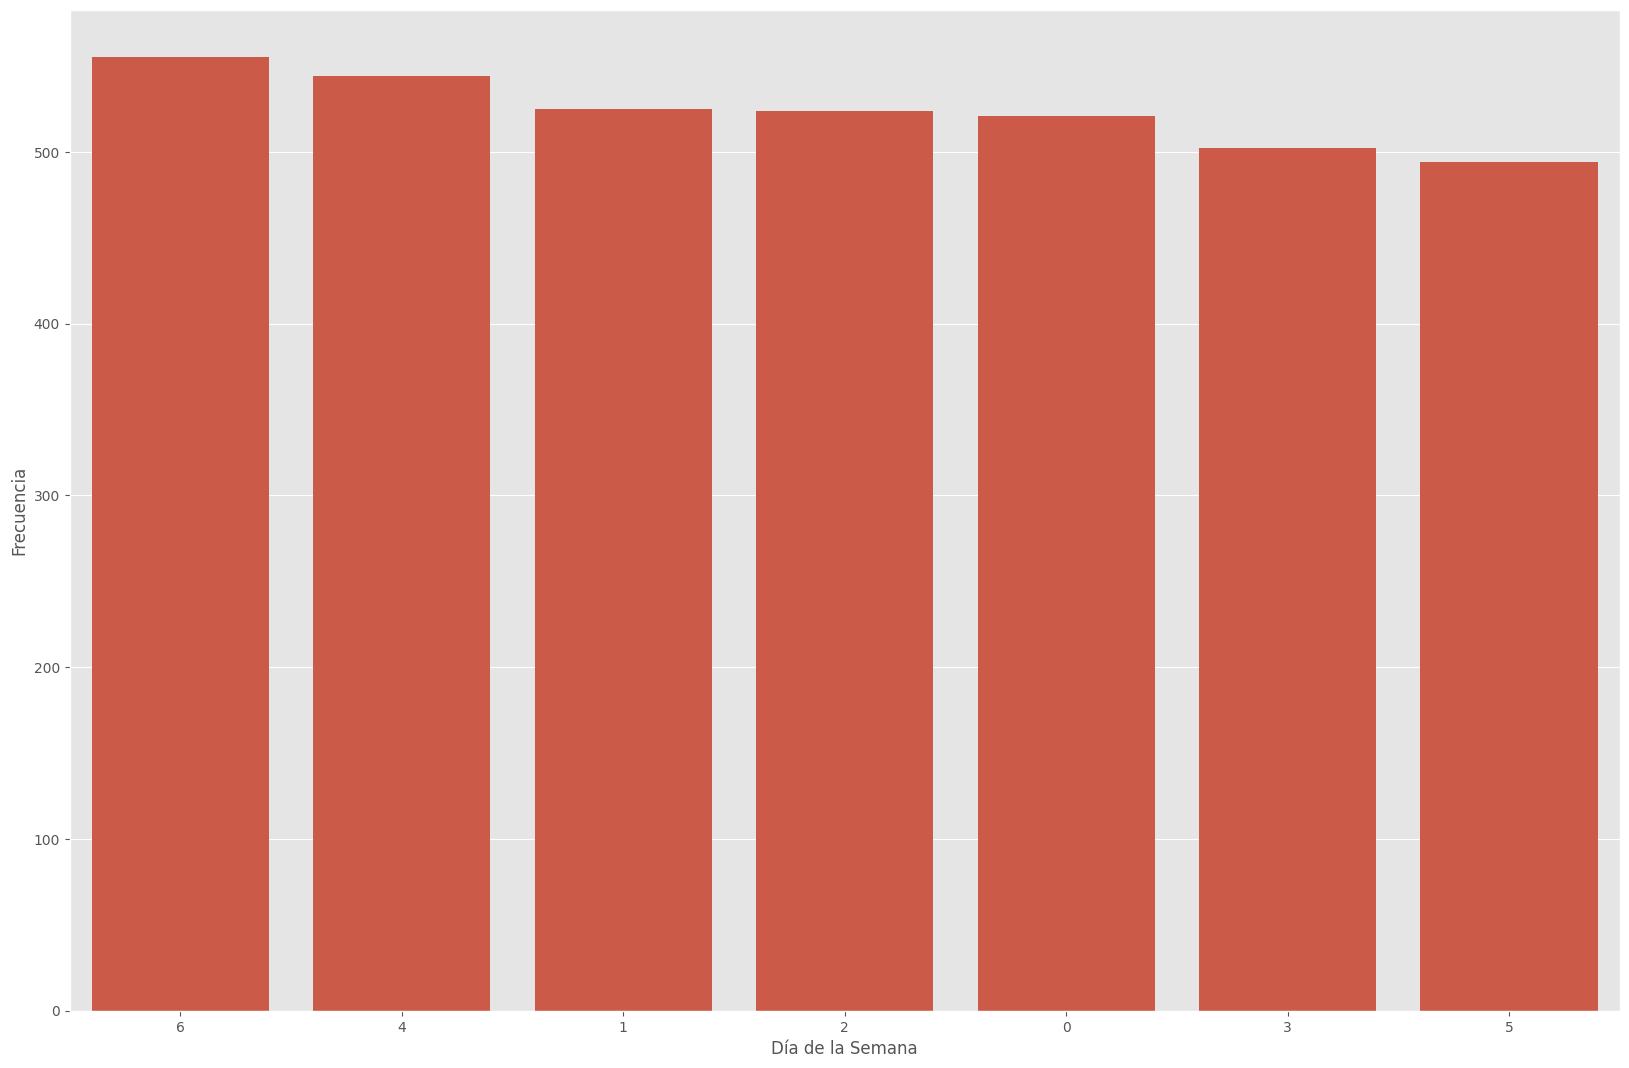

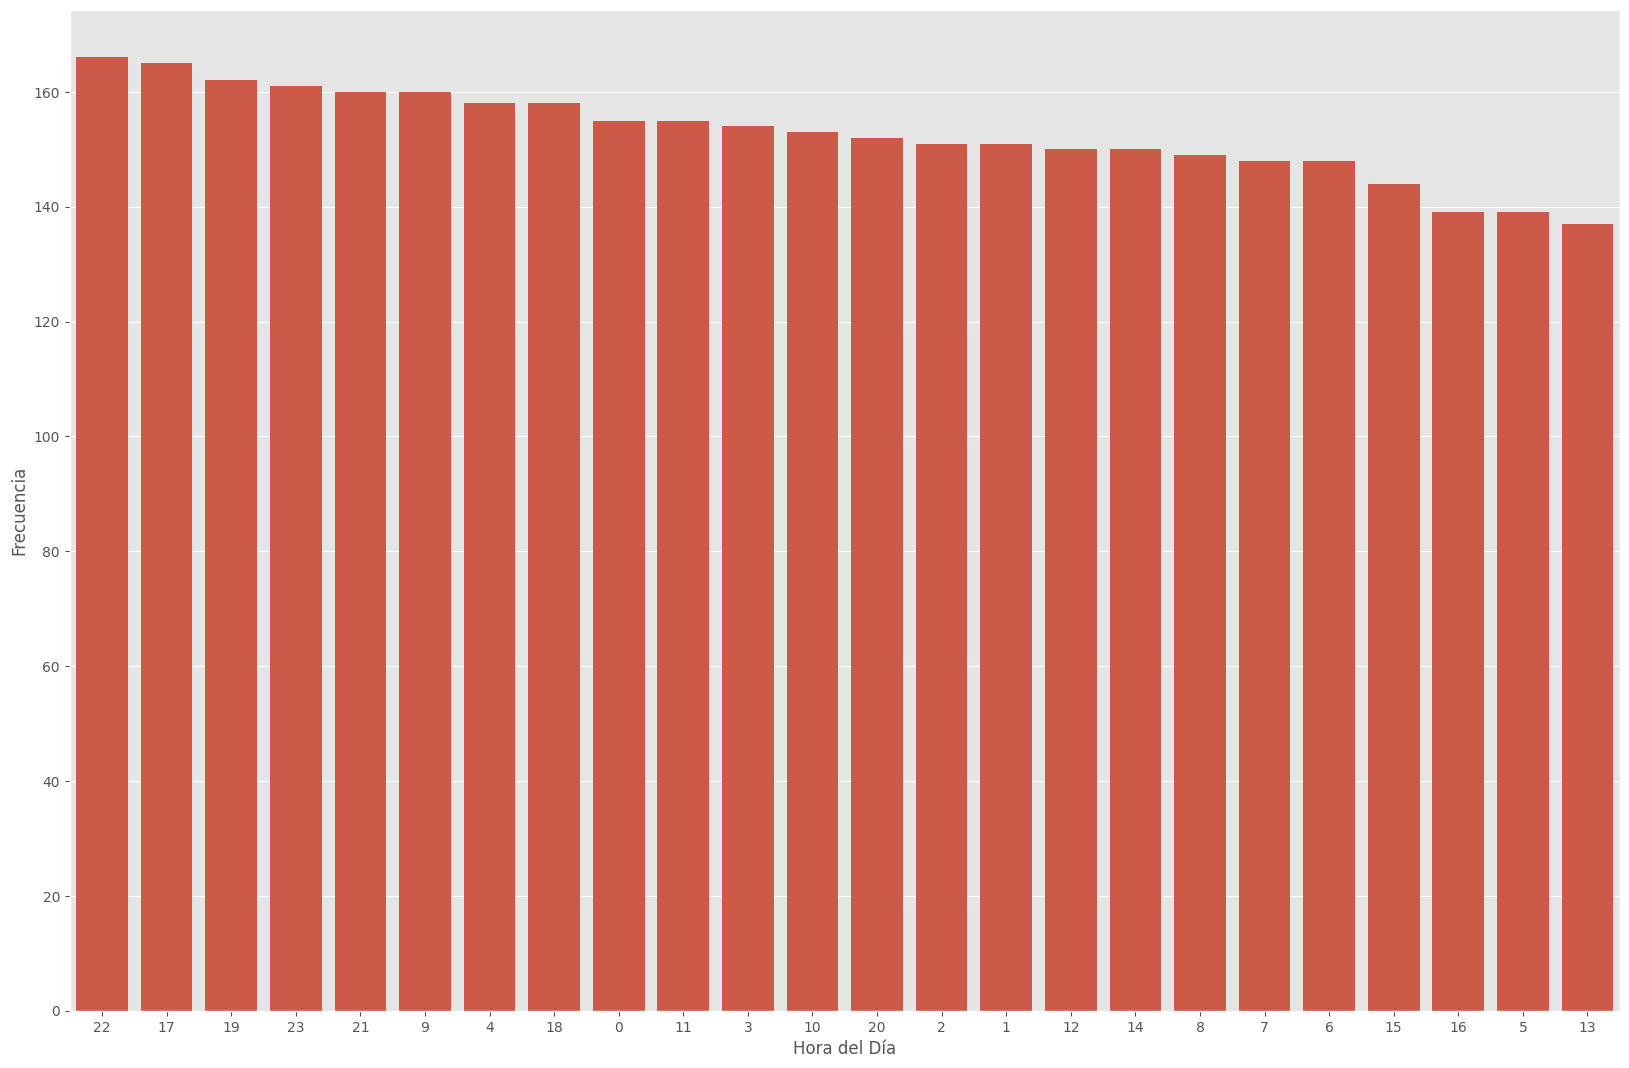

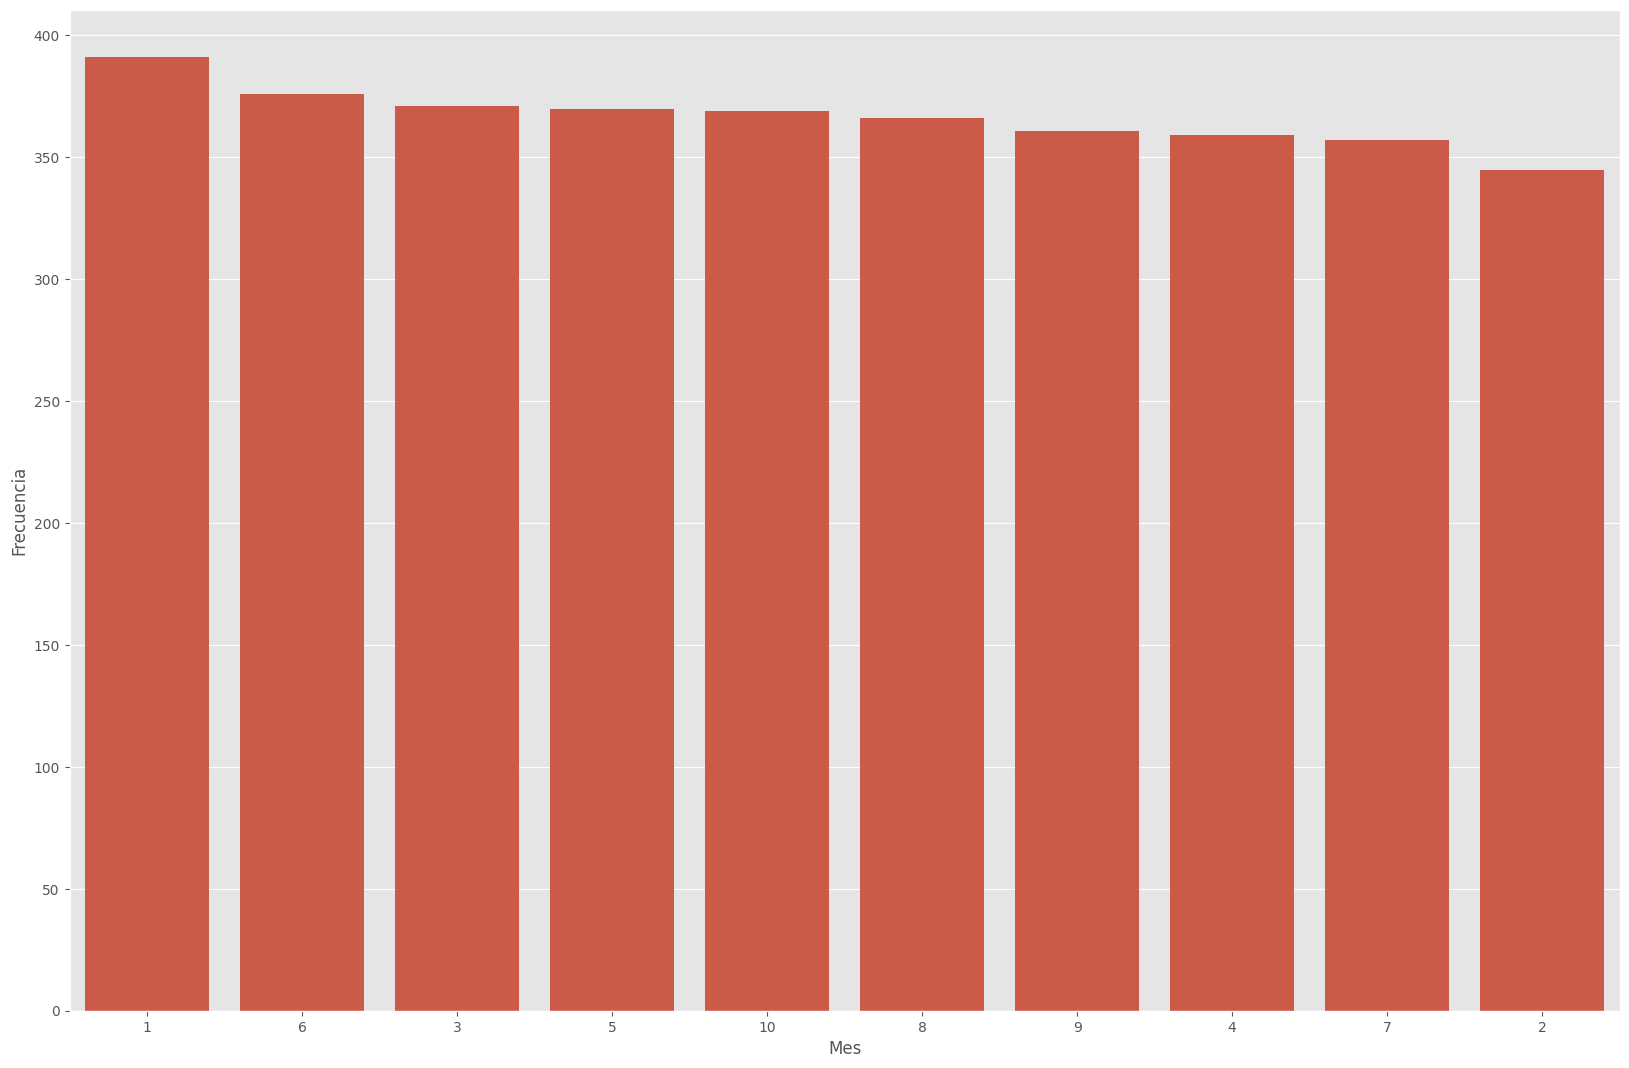

In [ ]:
sns.countplot(x='day_of_week', data=df_up, order=df_up['day_of_week'].value_counts().index)
#plt.title('Frecuencia de Días de la Semana donde el Precio Sube')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='hour_of_day', data=df_up, order=df_up['hour_of_day'].value_counts().index)
#plt.title('Frecuencia de Horas del Día donde el Precio Sube')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='month', data=df_up, order=df_up['month'].value_counts().index)
#plt.title('Frecuencia de Mes del Año donde el Precio Sube')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

Se aprecia que los días 6 y 4 tienen una frecuencia de subida de precio mayor a los demás días de la semana. Las horas con mayor frecuencia de subida de precio es desde las 17 horas hasta las 23, de acuerdo con los datos utilizados. Por último, se observa que los meses que tienen mayor frecuencia de subida de precios son el mes 1 y el 6.

In [ ]:
conteo_incidencias = df_up.groupby('day_of_week')['Response'].value_counts()
conteo_incidencias

day_of_week  Response
0            1           521
1            1           525
2            1           524
3            1           502
4            1           544
5            1           494
6            1           555
Name: count, dtype: int64

In [ ]:
conteo_incidencias2 = df_up.groupby('hour_of_day')['Response'].value_counts()
conteo_incidencias2

hour_of_day  Response
0            1           155
1            1           151
2            1           151
3            1           154
4            1           158
5            1           139
6            1           148
7            1           148
8            1           149
9            1           160
10           1           153
11           1           155
12           1           150
13           1           137
14           1           150
15           1           144
16           1           139
17           1           165
18           1           158
19           1           162
20           1           152
21           1           160
22           1           166
23           1           161
Name: count, dtype: int64

In [ ]:
conteo_incidencias3 = df_up.groupby('month')['Response'].value_counts()
conteo_incidencias3

month  Response
1      1           391
2      1           345
3      1           371
4      1           359
5      1           370
6      1           376
7      1           357
8      1           366
9      1           361
10     1           369
Name: count, dtype: int64

### Datos Atípicos

In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
iqr

Open                                      229.085
High                                       229.21
Low                                      229.6525
Close                                    228.9675
Volume                                 5299.42215
Close_time                      151 days 23:30:00
Quote_asset_volume                   8889670.5666
Number_of_trades                          6992.75
Taker_buy_base_asset_volume            2638.34725
Taker_buy_quote_asset_volume       4492961.443196
Ignore                                        0.0
Response                                      1.0
day_of_week                                   4.0
hour_of_day                                 11.75
month                                         5.0
dtype: object

<Axes: >

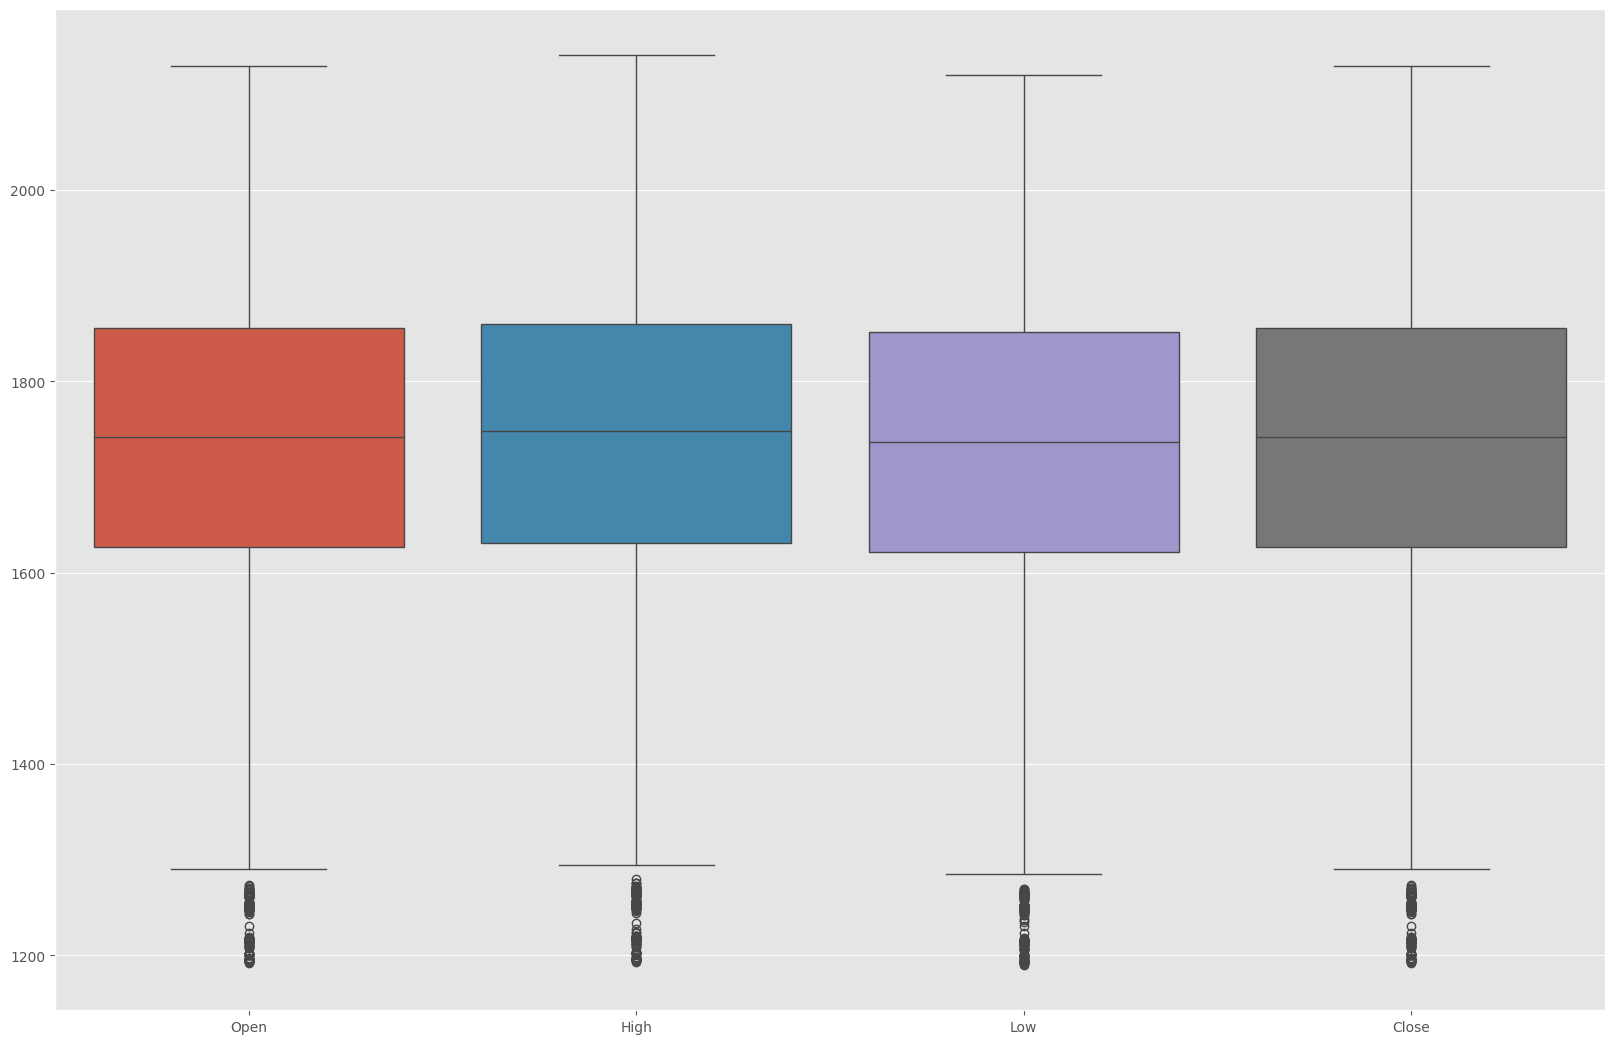

In [ ]:
sns.boxplot(data = df[['Open','High','Low','Close']])

<Axes: >

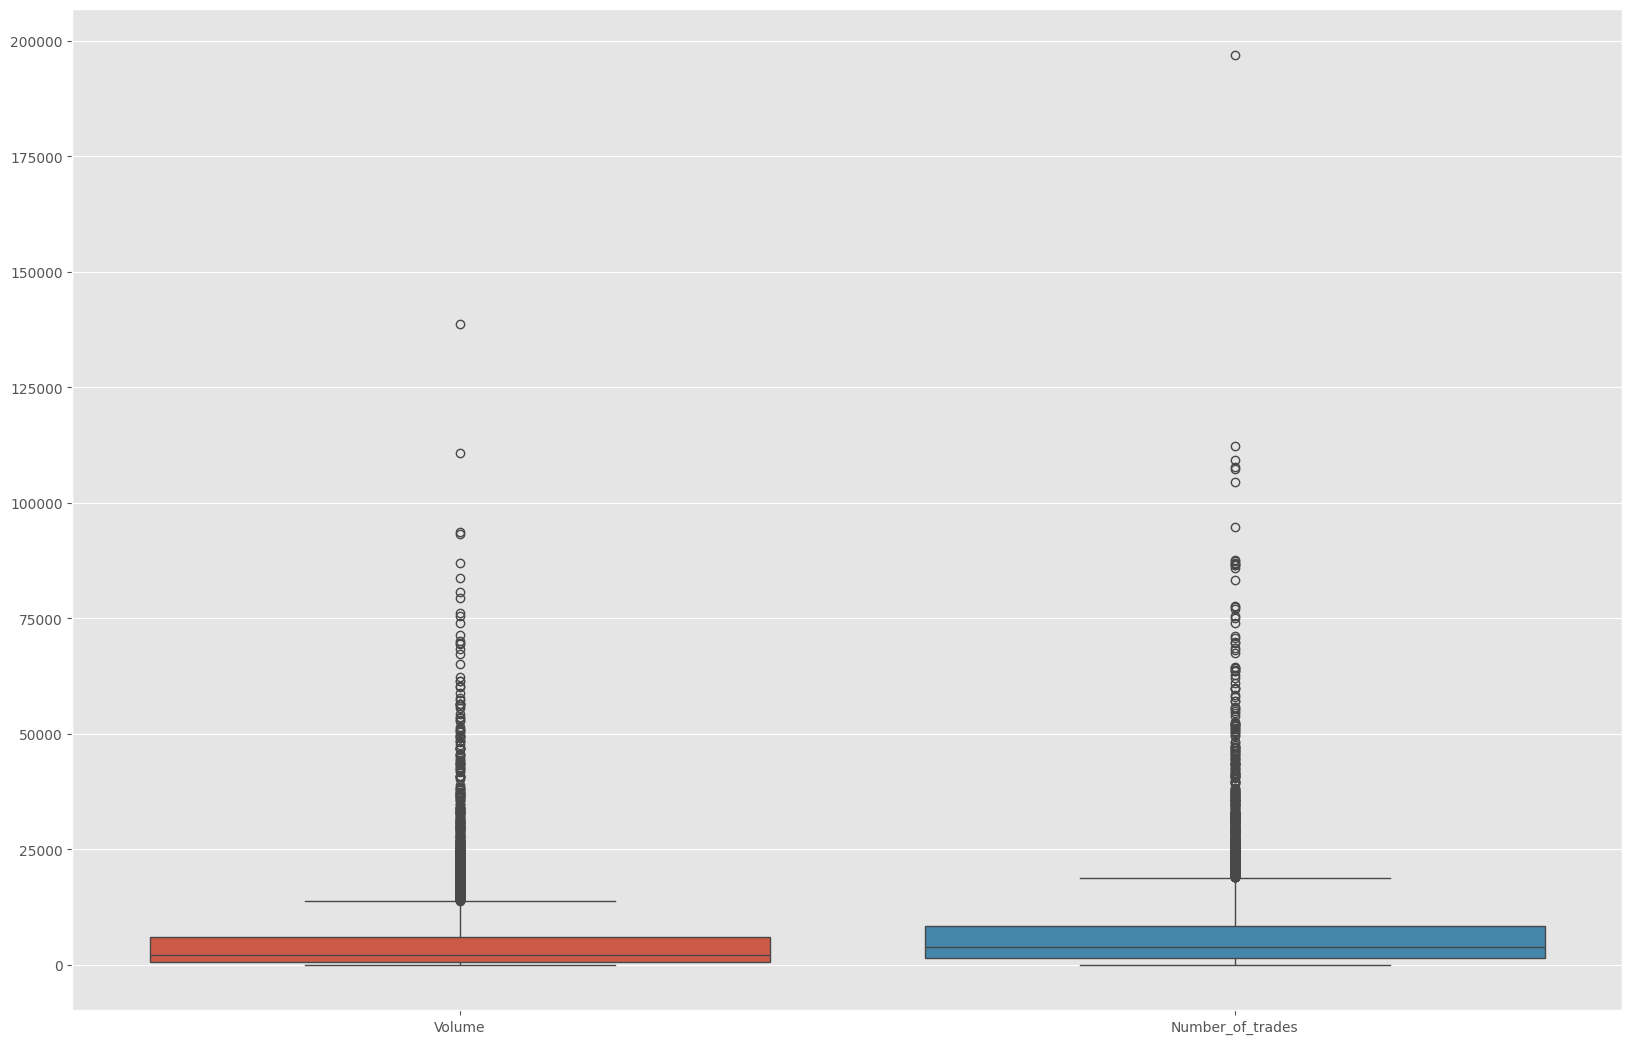

In [ ]:
sns.boxplot(data = df[['Volume','Number_of_trades']])

<Axes: >

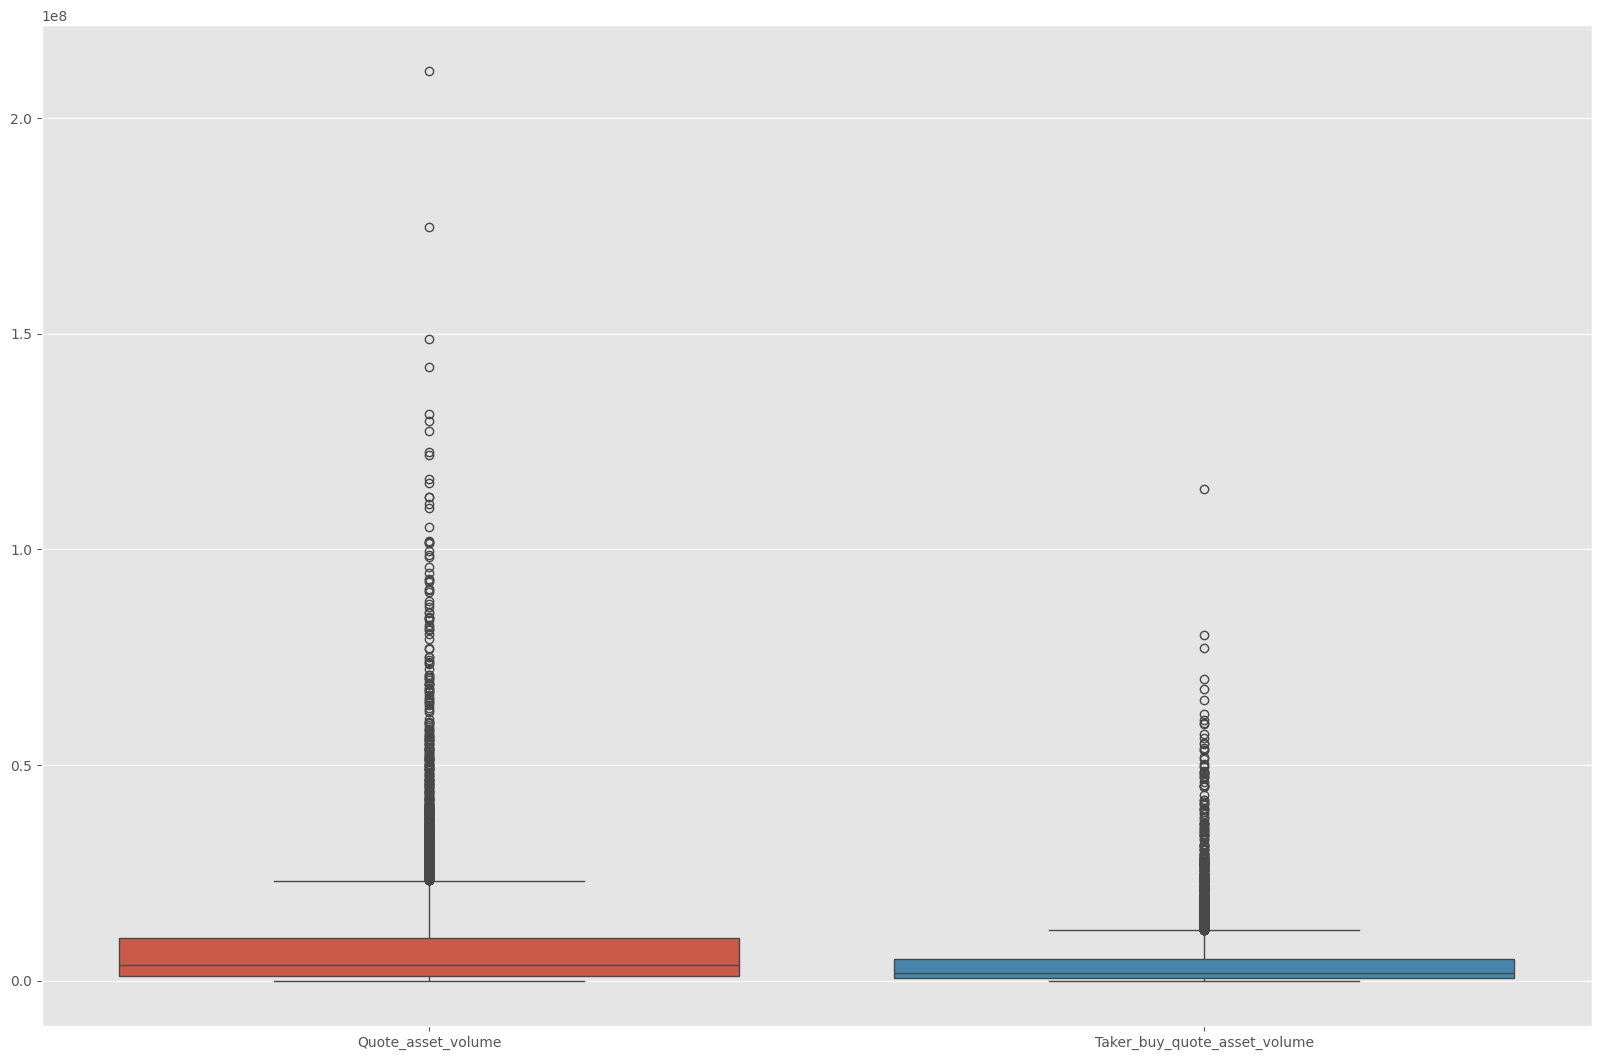

In [ ]:
sns.boxplot(data = df[['Quote_asset_volume','Taker_buy_quote_asset_volume']])

<Axes: ylabel='Taker_buy_base_asset_volume'>

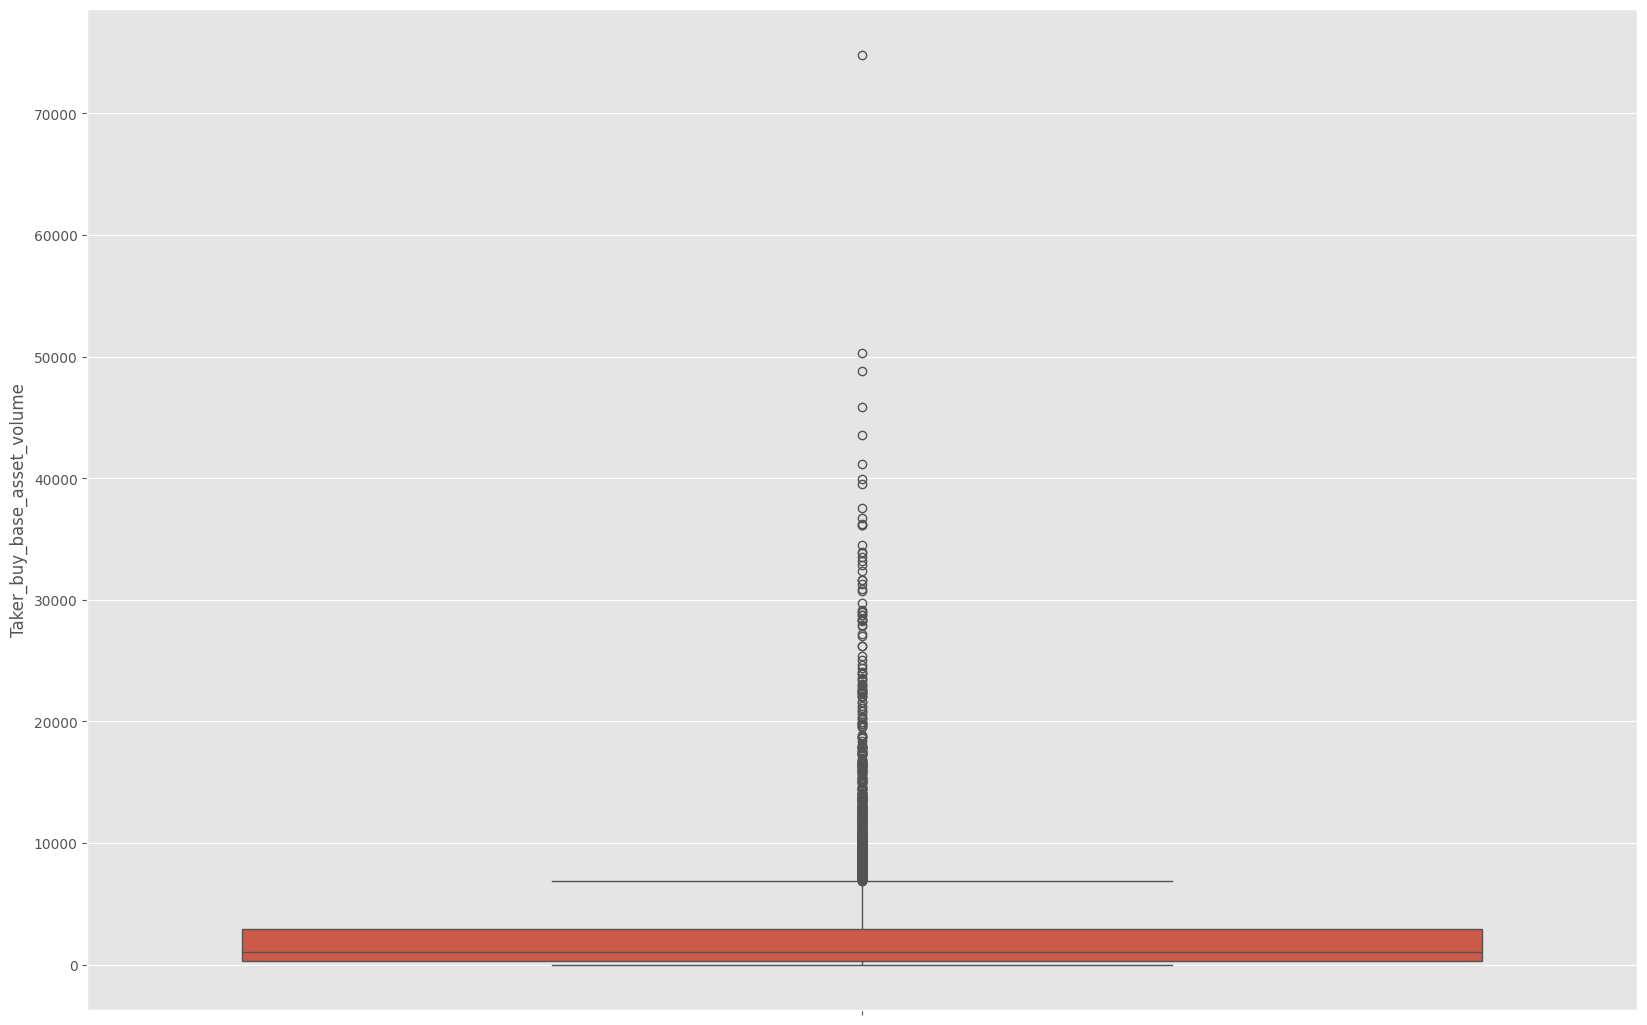

In [ ]:
sns.boxplot(data = df['Taker_buy_base_asset_volume'])

### Ajuste de Distribición de Probabilidad Empírica

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



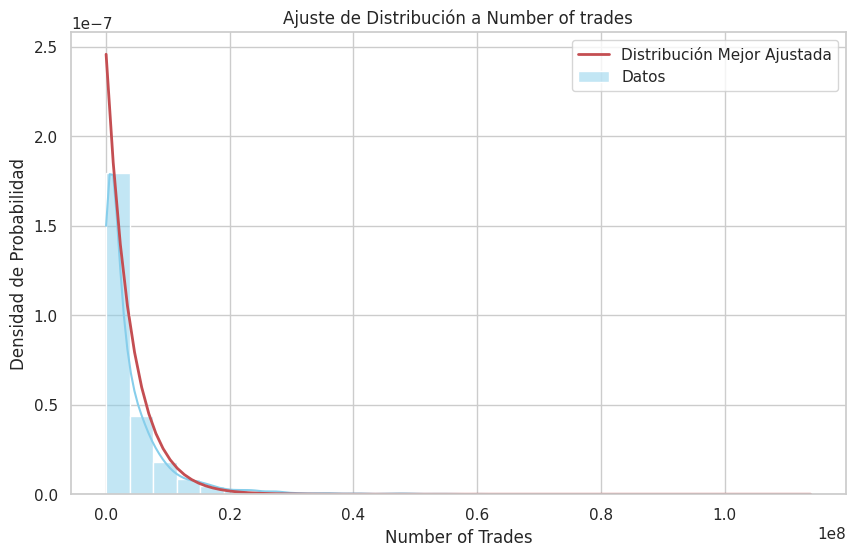

In [ ]:
# Seleccionar la columna 'volume' del DataFrame
datos_taker_quote = df['Taker_buy_quote_asset_volume']

# Obtener los parámetros de ajuste para varias distribuciones
distribuciones = ['gamma', 'expon', 'lognorm', 'beta', 'norm']
resultados_evaluacion = []
mejor_distribucion = None
mejor_parametros = None
mejor_sse = float('inf')

for distribucion in distribuciones:
    # Ajustar la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    parametros = distribucion_actual.fit(datos_taker_quote)

    # Calcular el error cuadrático medio (SSE) para evaluar el ajuste
    sse = sum((distribucion_actual.pdf(datos_taker_quote, *parametros) - datos_taker_quote)**2)

    # Calcular el AIC y el BIC
    n = len(datos_taker_quote)
    k = len(parametros)
    aic = n * np.log(sse / n) + 2 * k
    bic = n * np.log(sse / n) + k * np.log(n)

    resultados_evaluacion.append({
        'Distribución': distribucion,
        'SSE': sse,
        'AIC': aic,
        'BIC': bic
    })
    # Actualizar la mejor distribución si encontramos un SSE más bajo
    if sse < mejor_sse:
        mejor_distribucion = distribucion_actual
        mejor_parametros = parametros
        mejor_sse = sse

df_resultados = pd.DataFrame(resultados_evaluacion)
# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Creación de la gráfica con histograma y distribución mejor ajustada
plt.figure(figsize=(10, 6))
sns.histplot(datos_taker_quote, bins=30, kde=True, color='skyblue', label='Datos', stat='density')
x = np.linspace(datos_taker_quote.min(), datos_taker_quote.max(), 100)
pdf = mejor_distribucion.pdf(x, *mejor_parametros)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Mejor Ajustada')
plt.xlabel('Number of Trades')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución a Number of trades')
plt.legend()
plt.show()

In [ ]:
df_resultados

Distribución           SSE            AIC            BIC
0        gamma  4.328893e+17  231331.205356  231351.889778
1        expon  4.328893e+17  231329.205356  231342.994971
2      lognorm  4.328893e+17  231331.205356  231351.889778
3         beta  4.328893e+17  231333.205356  231360.784585
4         norm  4.328893e+17  231329.205356  231342.994971

Distribución Exponencial

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



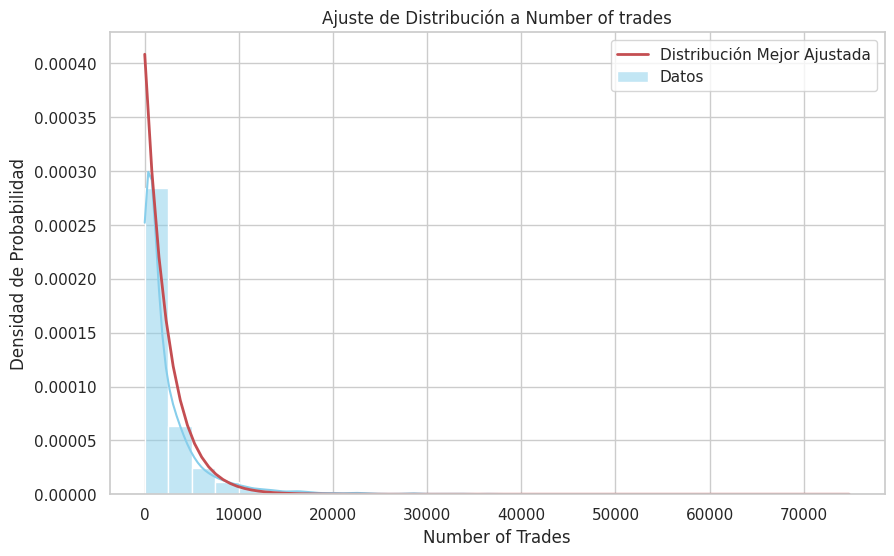

In [ ]:
# Seleccionar la columna 'volume' del DataFrame
datos_taker_base = df['Taker_buy_base_asset_volume']

# Obtener los parámetros de ajuste para varias distribuciones
distribuciones = ['gamma', 'expon', 'lognorm', 'beta', 'norm']
resultados_evaluacion = []
mejor_distribucion = None
mejor_parametros = None
mejor_sse = float('inf')

for distribucion in distribuciones:
    # Ajustar la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    parametros = distribucion_actual.fit(datos_taker_base)

    # Calcular el error cuadrático medio (SSE) para evaluar el ajuste
    sse = sum((distribucion_actual.pdf(datos_taker_base, *parametros) - datos_taker_base)**2)

    # Calcular el AIC y el BIC
    n = len(datos_taker_base)
    k = len(parametros)
    aic = n * np.log(sse / n) + 2 * k
    bic = n * np.log(sse / n) + k * np.log(n)

    resultados_evaluacion.append({
        'Distribución': distribucion,
        'SSE': sse,
        'AIC': aic,
        'BIC': bic
    })
    # Actualizar la mejor distribución si encontramos un SSE más bajo
    if sse < mejor_sse:
        mejor_distribucion = distribucion_actual
        mejor_parametros = parametros
        mejor_sse = sse

df_resultados = pd.DataFrame(resultados_evaluacion)
# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Creación de la gráfica con histograma y distribución mejor ajustada
plt.figure(figsize=(10, 6))
sns.histplot(datos_taker_base, bins=30, kde=True, color='skyblue', label='Datos', stat='density')
x = np.linspace(datos_taker_base.min(), datos_taker_base.max(), 100)
pdf = mejor_distribucion.pdf(x, *mejor_parametros)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Mejor Ajustada')
plt.xlabel('Number of Trades')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución a Number of trades')
plt.legend()
plt.show()

In [ ]:
df_resultados

Distribución           SSE            AIC            BIC
0        gamma  4.622806e+32  483736.183462  483756.867885
1        expon  1.668511e+11  123604.917283  123618.706898
2      lognorm  1.668511e+11  123606.917294  123627.601716
3         beta  1.668511e+11  123608.917295  123636.496524
4         norm  1.668511e+11  123604.917325  123618.706940

Distribución Exponencial

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



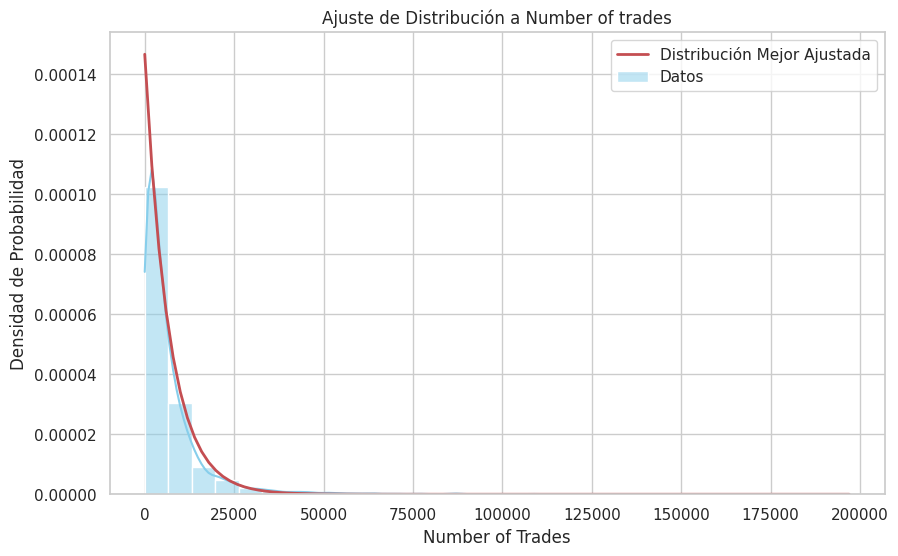

In [ ]:
# Seleccionar la columna 'volume' del DataFrame
datos_number = df['Number_of_trades']

# Obtener los parámetros de ajuste para varias distribuciones
distribuciones = ['gamma', 'expon', 'lognorm', 'beta', 'norm']
resultados_evaluacion = []
mejor_distribucion = None
mejor_parametros = None
mejor_sse = float('inf')

for distribucion in distribuciones:
    # Ajustar la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    parametros = distribucion_actual.fit(datos_number)

    # Calcular el error cuadrático medio (SSE) para evaluar el ajuste
    sse = sum((distribucion_actual.pdf(datos_number, *parametros) - datos_number)**2)

    # Calcular el AIC y el BIC
    n = len(datos_number)
    k = len(parametros)
    aic = n * np.log(sse / n) + 2 * k
    bic = n * np.log(sse / n) + k * np.log(n)

    resultados_evaluacion.append({
        'Distribución': distribucion,
        'SSE': sse,
        'AIC': aic,
        'BIC': bic
    })
    # Actualizar la mejor distribución si encontramos un SSE más bajo
    if sse < mejor_sse:
        mejor_distribucion = distribucion_actual
        mejor_parametros = parametros
        mejor_sse = sse

df_resultados = pd.DataFrame(resultados_evaluacion)
# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Creación de la gráfica con histograma y distribución mejor ajustada
plt.figure(figsize=(10, 6))
sns.histplot(datos_number, bins=30, kde=True, color='skyblue', label='Datos', stat='density')
x = np.linspace(datos_number.min(), datos_number.max(), 100)
pdf = mejor_distribucion.pdf(x, *mejor_parametros)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Mejor Ajustada')
plt.xlabel('Number of Trades')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución a Number of trades')
plt.legend()
plt.show()

In [ ]:
df_resultados

Distribución           SSE            AIC            BIC
0        gamma  2.533528e+20  277808.982999  277829.667421
1        expon  1.005910e+12  136708.926003  136722.715618
2      lognorm  1.005910e+12  136710.926003  136731.610425
3         beta  1.005910e+12  136712.926004  136740.505233
4         norm  1.005910e+12  136708.926010  136722.715624

Distribución Exponencial

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



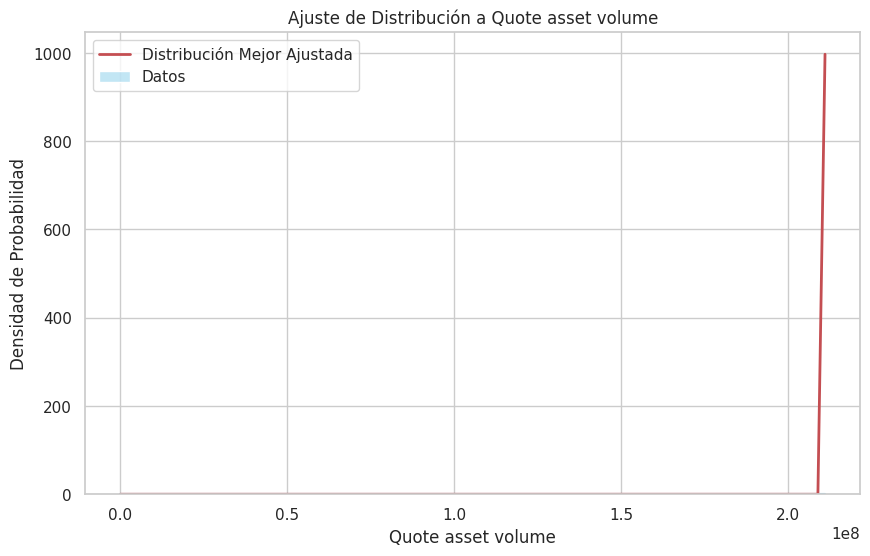

In [ ]:
# Seleccionar la columna 'volume' del DataFrame
datos_quote = df['Quote_asset_volume']

# Obtener los parámetros de ajuste para varias distribuciones
distribuciones = ['gamma', 'expon', 'lognorm', 'beta', 'norm']
resultados_evaluacion = []
mejor_distribucion = None
mejor_parametros = None
mejor_sse = float('inf')

for distribucion in distribuciones:
    # Ajustar la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    parametros = distribucion_actual.fit(datos_quote)

    # Calcular el error cuadrático medio (SSE) para evaluar el ajuste
    sse = sum((distribucion_actual.pdf(datos_quote, *parametros) - datos_quote)**2)

    # Calcular el AIC y el BIC
    n = len(datos_quote)
    k = len(parametros)
    aic = n * np.log(sse / n) + 2 * k
    bic = n * np.log(sse / n) + k * np.log(n)

    resultados_evaluacion.append({
        'Distribución': distribucion,
        'SSE': sse,
        'AIC': aic,
        'BIC': bic
    })
    # Actualizar la mejor distribución si encontramos un SSE más bajo
    if sse < mejor_sse:
        mejor_distribucion = distribucion_actual
        mejor_parametros = parametros
        mejor_sse = sse

df_resultados = pd.DataFrame(resultados_evaluacion)
# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Creación de la gráfica con histograma y distribución mejor ajustada
plt.figure(figsize=(10, 6))
sns.histplot(datos_quote, bins=30, kde=True, color='skyblue', label='Datos', stat='density')
x = np.linspace(datos_quote.min(), datos_quote.max(), 100)
pdf = mejor_distribucion.pdf(x, *mejor_parametros)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Mejor Ajustada')
plt.xlabel('Quote asset volume')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución a Quote asset volume')
plt.legend()
plt.show()

In [ ]:
df_resultados

Distribución           SSE            AIC            BIC
0        gamma  1.705955e+18  241334.183714  241354.868136
1        expon  1.705955e+18  241332.185513  241345.975128
2      lognorm  1.705955e+18  241334.185513  241354.869936
3         beta  1.705955e+18  241336.185513  241363.764743
4         norm  1.705955e+18  241332.185513  241345.975128

Distribución Exponencial

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



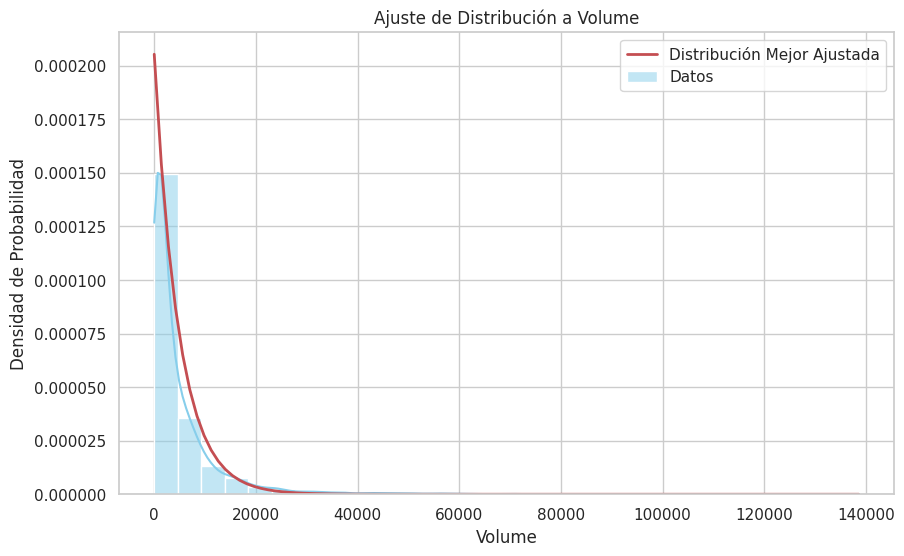

In [ ]:
# Seleccionar la columna 'volume' del DataFrame
datos_volume = df['Volume']

# Obtener los parámetros de ajuste para varias distribuciones
distribuciones = ['gamma', 'expon', 'lognorm', 'beta', 'norm']
resultados_evaluacion = []
mejor_distribucion = None
mejor_parametros = None
mejor_sse = float('inf')

for distribucion in distribuciones:
    # Ajustar la distribución a los datos
    distribucion_actual = getattr(stats, distribucion)
    parametros = distribucion_actual.fit(datos_volume)

    # Calcular el error cuadrático medio (SSE) para evaluar el ajuste
    sse = sum((distribucion_actual.pdf(datos_volume, *parametros) - datos_volume)**2)

    # Calcular el AIC y el BIC
    n = len(datos_volume)
    k = len(parametros)
    aic = n * np.log(sse / n) + 2 * k
    bic = n * np.log(sse / n) + k * np.log(n)

    resultados_evaluacion.append({
        'Distribución': distribucion,
        'SSE': sse,
        'AIC': aic,
        'BIC': bic
    })
    # Actualizar la mejor distribución si encontramos un SSE más bajo
    if sse < mejor_sse:
        mejor_distribucion = distribucion_actual
        mejor_parametros = parametros
        mejor_sse = sse

df_resultados = pd.DataFrame(resultados_evaluacion)
# Configuración del estilo de la gráfica
sns.set(style="whitegrid")

# Creación de la gráfica con histograma y distribución mejor ajustada
plt.figure(figsize=(10, 6))
sns.histplot(datos_volume, bins=30, kde=True, color='skyblue', label='Datos', stat='density')
x = np.linspace(datos_volume.min(), datos_volume.max(), 100)
pdf = mejor_distribucion.pdf(x, *mejor_parametros)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Mejor Ajustada')
plt.xlabel('Volume')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución a Volume')
plt.legend()
plt.show()

In [ ]:
df_resultados

Distribución           SSE            AIC            BIC
0        gamma  2.530898e+34  512932.188959  512952.873381
1        expon  6.562986e+11  133594.152064  133607.941679
2      lognorm  6.562986e+11  133596.152067  133616.836489
3         beta  6.577207e+11  133613.939887  133641.519117
4         norm  6.562986e+11  133594.152075  133607.941690

Distribución Exponencial

### Nuevas Características

In [ ]:
df.set_index('Open_time', inplace=True)

KeyError: "None of ['Open_time'] are in the columns"

In [ ]:
df.drop('Close_time', axis=1, inplace=True)

In [ ]:
df.shape

(7294, 14)

### Características Lineales

In [ ]:
df['co'] = df['Close'].shift(-1) - df['Open']
df['hl'] = df['High'].shift(-1) - df['Low']
df['ol'] = df['Open'].shift(-1) - df['Low']
df['ho'] = df['High'].shift(-1) - df['Open']
df['cov'] = df['co'] / df['Volume']
df['hlv'] = df['hl'] / df['Volume']

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
np.shape(df)

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Ignore                          0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              1
hl                              1
ol                              1
ho                              1
cov                             1
hlv                             1
dtype: int64


(7294, 20)

In [ ]:
df = df.dropna()

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
np.shape(df)

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Ignore                          0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
dtype: int64


(7293, 20)

In [ ]:
df.drop('Open', axis=1, inplace=True)
df.drop('High', axis=1, inplace=True)
df.drop('Low', axis=1, inplace=True)
df.drop('Close', axis=1, inplace=True)
df.drop('Ignore', axis=1, inplace=True)

<ipython-input-43-3b0a18feda7f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-3b0a18feda7f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-3b0a18feda7f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-3b0a18feda7f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
df.head()

Volume  Quote_asset_volume  Number_of_trades  \
Open_time                                                              
2023-01-01 01:00:00  2738.3979        3.271612e+06              3308   
2023-01-01 02:00:00  2429.3965        2.902240e+06              3194   
2023-01-01 03:00:00  5148.8046        6.141005e+06              4962   
2023-01-01 04:00:00  4333.7378        5.165866e+06              4161   
2023-01-01 05:00:00  1544.9423        1.843229e+06              2125   

                     Taker_buy_base_asset_volume  \
Open_time                                          
2023-01-01 01:00:00                    1254.0049   
2023-01-01 02:00:00                     979.2334   
2023-01-01 03:00:00                    1744.5012   
2023-01-01 04:00:00                    1664.9285   
2023-01-01 05:00:00                     731.0198   

                     Taker_buy_quote_asset_volume  Response  day_of_week  \
Open_time                                                                  
2023-01-01 01:00:00                  1.498065e+06         1            6   
2023-01-01 02:00:00                  1.169702e+06         0            6   
2023-01-01 03:00:00                  2.080476e+06         0            6   
2023-01-01 04:00:00                  1.984479e+06         0            6   
2023-01-01 05:00:00                  8.721530e+05         1            6   

                     hour_of_day  month    co    hl    ol    ho       cov  \
Open_time                                                                   
2023-01-01 01:00:00            1      1  1.33  2.69  1.97  2.57  0.000486   
2023-01-01 02:00:00            2      1 -1.91  1.34  1.34 -0.53 -0.000786   
2023-01-01 03:00:00            3      1 -2.51  2.26  2.26 -1.38 -0.000487   
2023-01-01 04:00:00            4      1  0.40  3.77  2.12  0.52  0.000092   
2023-01-01 05:00:00            5      1  1.79  2.21  1.63  2.12  0.001159   

                          hlv  
Open_time                      
2023-01-01 01:00:00  0.000982  
2023-01-01 02:00:00  0.000552  
2023-01-01 03:00:00  0.000439  
2023-01-01 04:00:00  0.000870  
2023-01-01 05:00:00  0.001430

<Axes: >

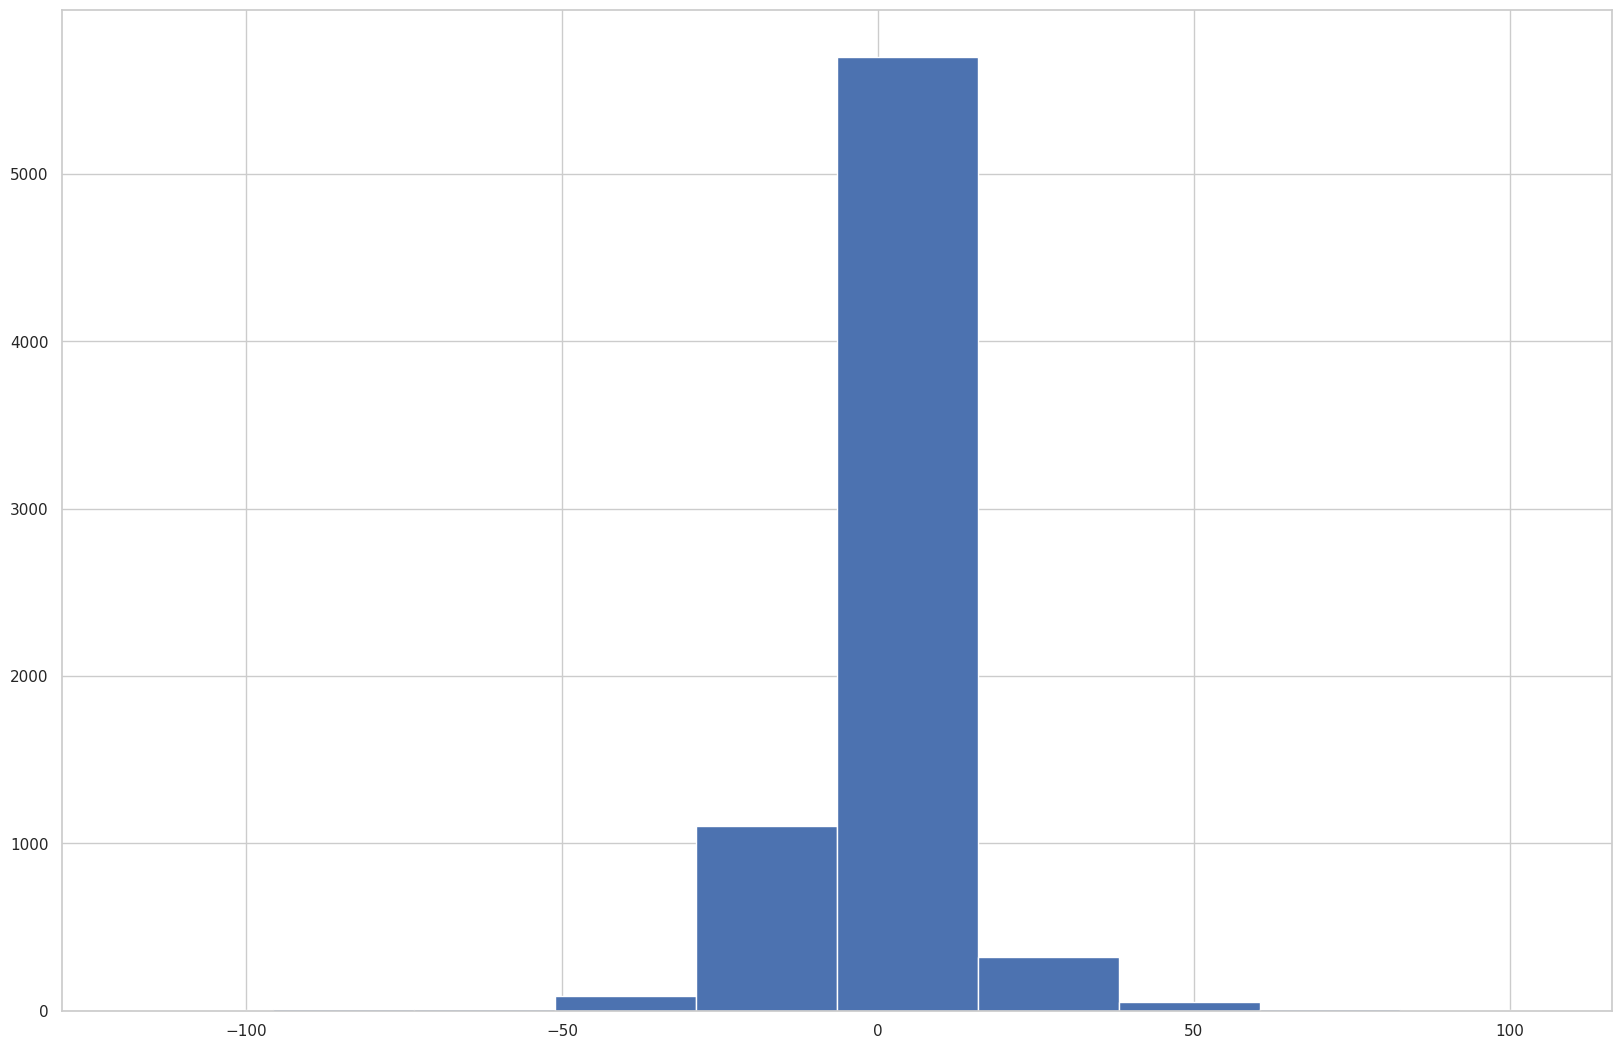

In [ ]:
df['co'].hist()

<Axes: >

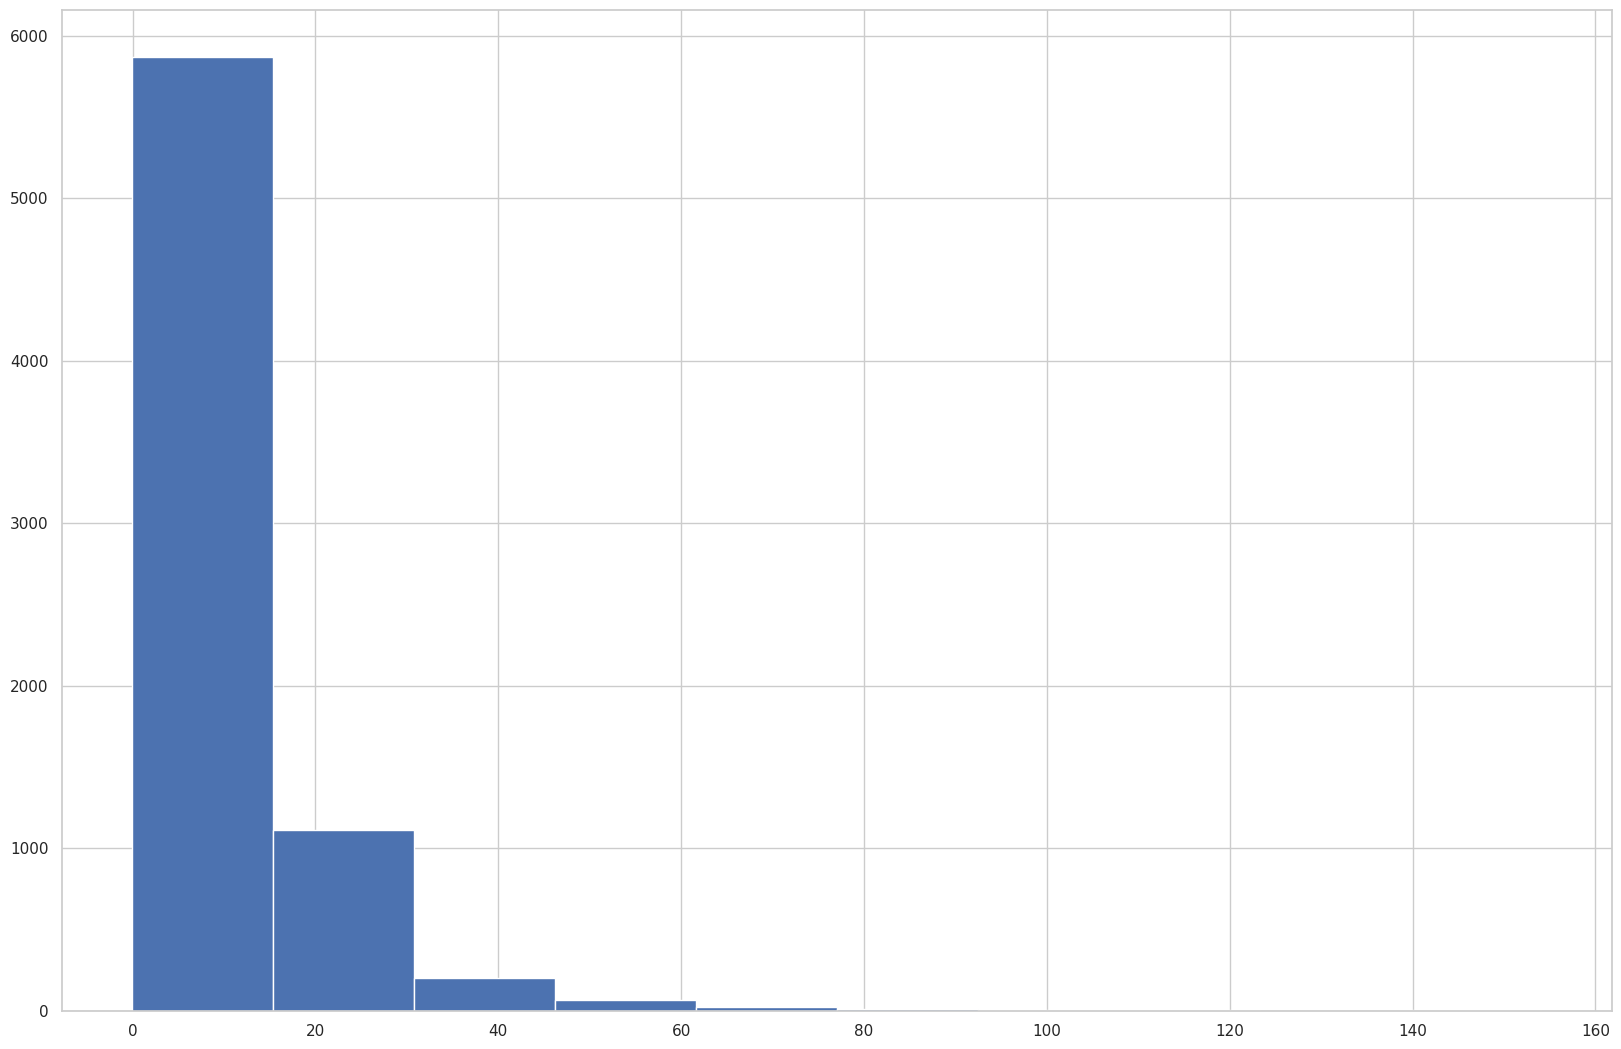

In [ ]:
df['hl'].hist()

<Axes: >

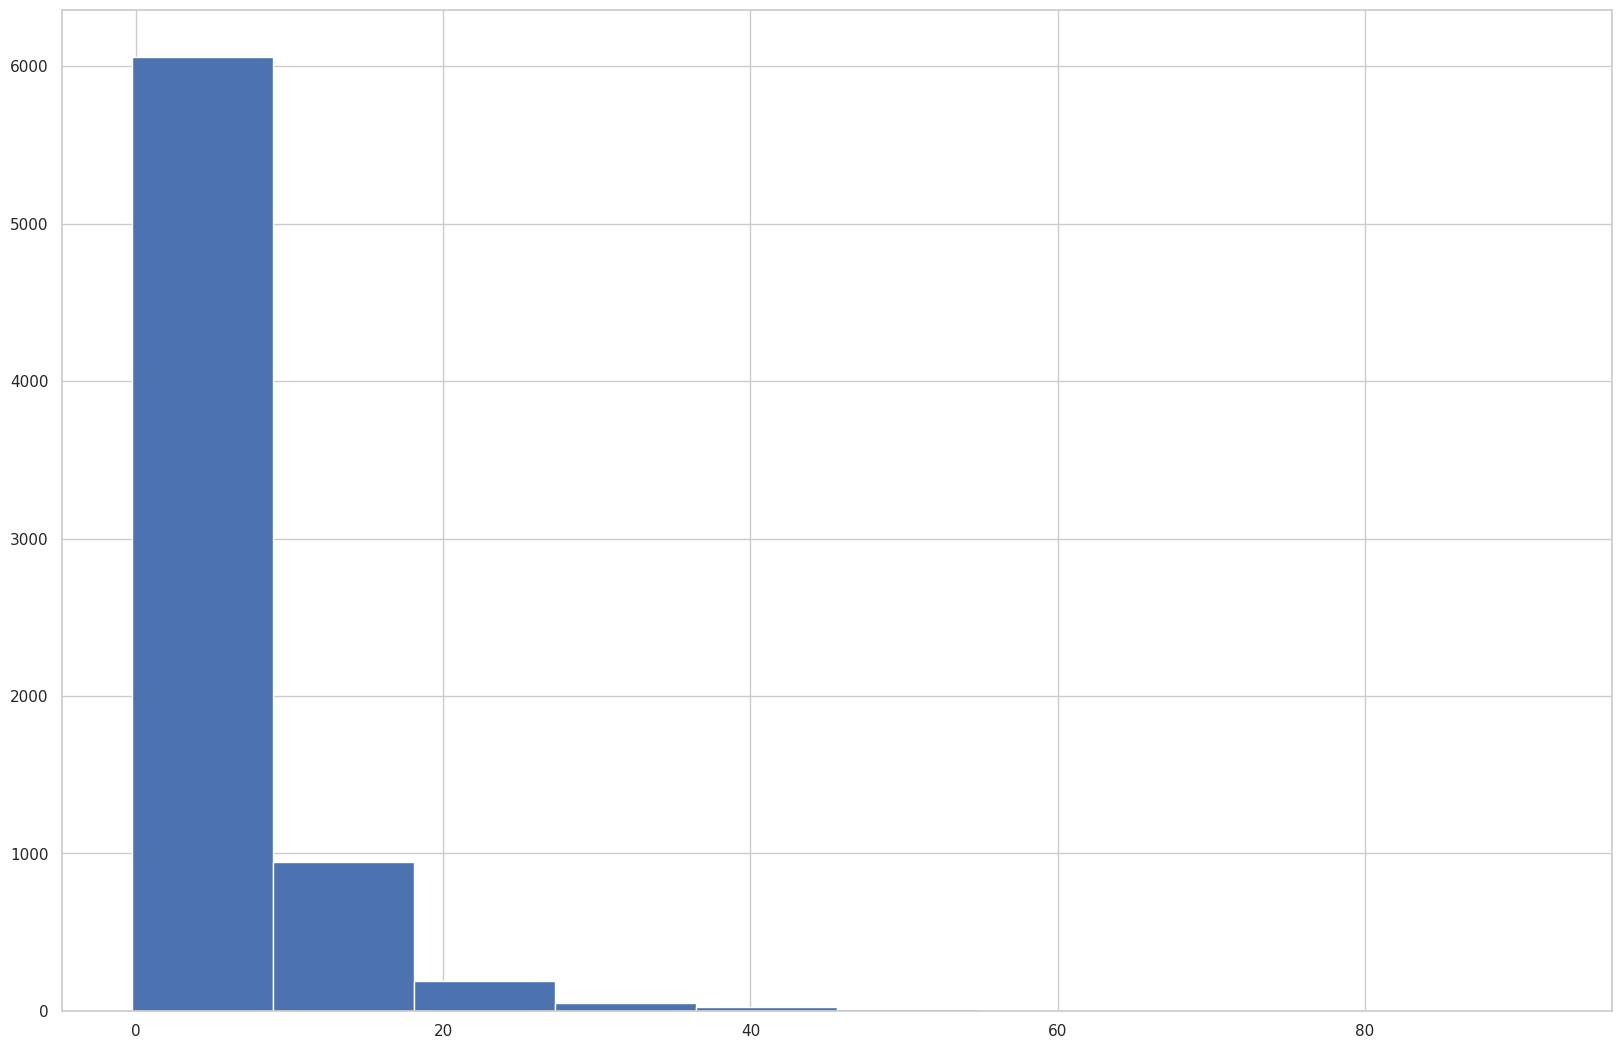

In [ ]:
df['ol'].hist()

<Axes: >

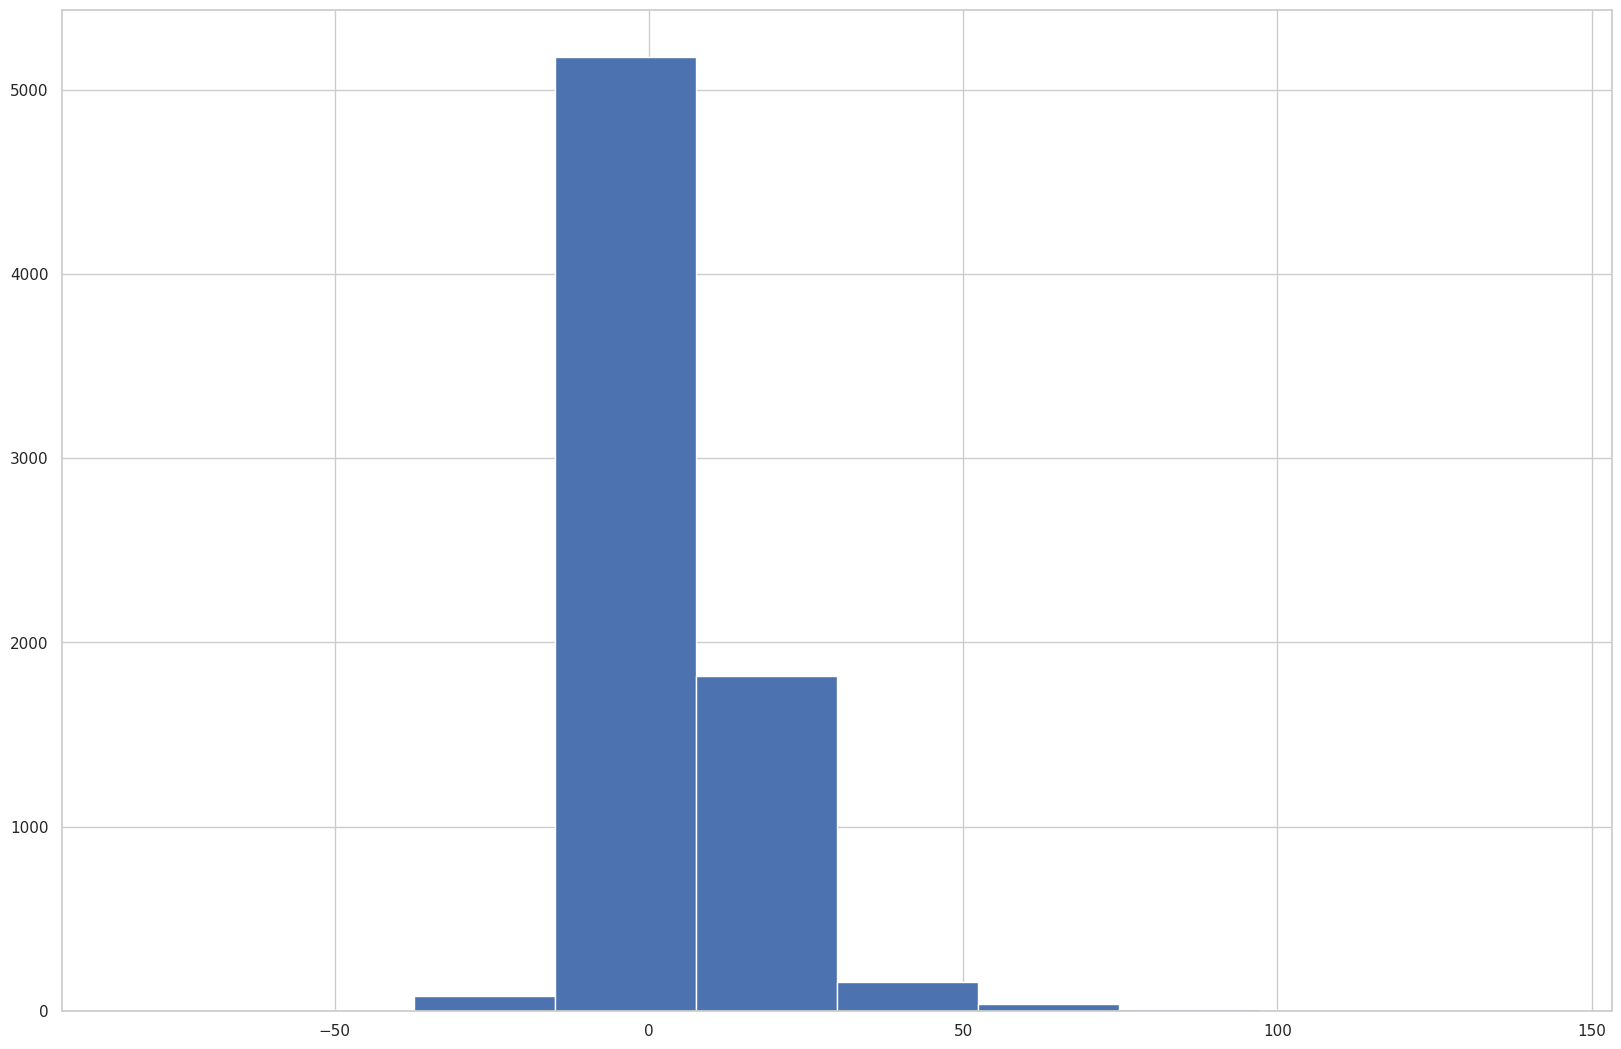

In [ ]:
df['ho'].hist()

<Axes: >

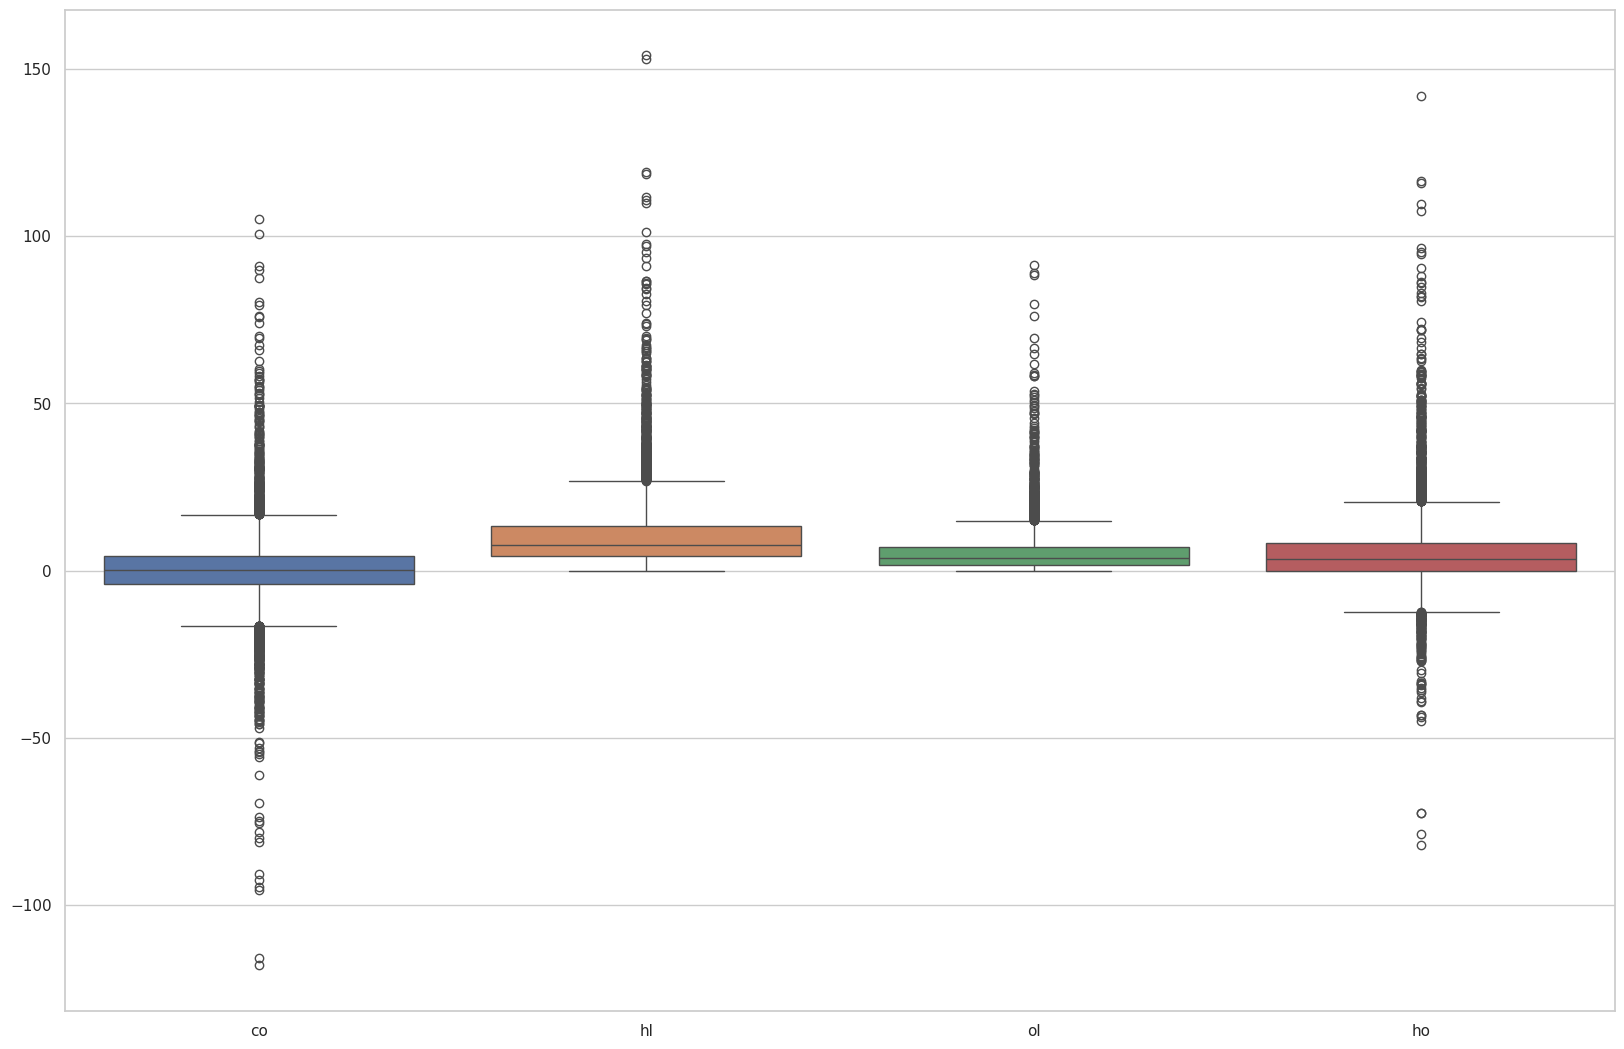

In [ ]:
sns.boxplot(data = df[['co','hl','ol','ho']])

In [ ]:
df.shape

(7293, 15)

### Características Autoregresivas

In [ ]:
df['ma_ol_2'] = df['ol'].rolling(2).mean()
df['ma_ho_2'] = df['ho'].rolling(2).mean()
df['ma_hl_2'] = df['hl'].rolling(2).mean()
df['ma_hlv_2'] = df['hlv'].rolling(2).mean()
df['ma_cov_2'] = df['cov'].rolling(2).mean()

df['sd_ol_2'] = df['ol'].rolling(2).std()
df['sd_ho_2'] = df['ho'].rolling(2).std()
df['sd_hl_2'] = df['hl'].rolling(2).std()
df['sd_hlv_2'] = df['hlv'].rolling(2).std()
df['sd_cov_2'] = df['cov'].rolling(2).std()

df['lag_vol_2'] = df['Volume'].shift(2)
df['sum_vol_2'] = df['Volume'].rolling(2).sum()
df['mean_vol_2'] = df['Volume'].rolling(2).mean()


<ipython-input-51-4334e24be719>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-4334e24be719>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-4334e24be719>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-4334e24

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
np.shape(df)

Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
ma_ol_2                         1
ma_ho_2                         1
ma_hl_2                         1
ma_hlv_2                        3
ma_cov_2                        3
sd_ol_2                         1
sd_ho_2                         1
sd_hl_2                         1
sd_hlv_2                        3
sd_cov_2                        3
lag_vol_2                       2
sum_vol_2                       1
mean_vol_2                      1
dtype: int64


(7293, 28)

In [ ]:
df_filled = df.fillna(0)

In [ ]:
missing_values_count = df_filled.isnull().sum()
print(missing_values_count)
np.shape(df_filled)

Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
ma_ol_2                         0
ma_ho_2                         0
ma_hl_2                         0
ma_hlv_2                        0
ma_cov_2                        0
sd_ol_2                         0
sd_ho_2                         0
sd_hl_2                         0
sd_hlv_2                        0
sd_cov_2                        0
lag_vol_2                       0
sum_vol_2                       0
mean_vol_2                      0
dtype: int64


(7293, 28)

In [ ]:
df_filled.head()

Volume  Quote_asset_volume  Number_of_trades  \
Open_time                                                              
2023-01-01 01:00:00  2738.3979        3.271612e+06              3308   
2023-01-01 02:00:00  2429.3965        2.902240e+06              3194   
2023-01-01 03:00:00  5148.8046        6.141005e+06              4962   
2023-01-01 04:00:00  4333.7378        5.165866e+06              4161   
2023-01-01 05:00:00  1544.9423        1.843229e+06              2125   

                     Taker_buy_base_asset_volume  \
Open_time                                          
2023-01-01 01:00:00                    1254.0049   
2023-01-01 02:00:00                     979.2334   
2023-01-01 03:00:00                    1744.5012   
2023-01-01 04:00:00                    1664.9285   
2023-01-01 05:00:00                     731.0198   

                     Taker_buy_quote_asset_volume  Response  day_of_week  \
Open_time                                                                  
2023-01-01 01:00:00                  1.498065e+06         1            6   
2023-01-01 02:00:00                  1.169702e+06         0            6   
2023-01-01 03:00:00                  2.080476e+06         0            6   
2023-01-01 04:00:00                  1.984479e+06         0            6   
2023-01-01 05:00:00                  8.721530e+05         1            6   

                     hour_of_day  month    co  ...  ma_hlv_2  ma_cov_2  \
Open_time                                      ...                       
2023-01-01 01:00:00            1      1  1.33  ...  0.000000  0.000000   
2023-01-01 02:00:00            2      1 -1.91  ...  0.000767 -0.000150   
2023-01-01 03:00:00            3      1 -2.51  ...  0.000495 -0.000637   
2023-01-01 04:00:00            4      1  0.40  ...  0.000654 -0.000198   
2023-01-01 05:00:00            5      1  1.79  ...  0.001150  0.000625   

                      sd_ol_2   sd_ho_2   sd_hl_2  sd_hlv_2  sd_cov_2  \
Open_time                                                               
2023-01-01 01:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-01-01 02:00:00  0.445477  2.192031  0.954594  0.000305  0.000899   
2023-01-01 03:00:00  0.650538  0.601041  0.650538  0.000080  0.000211   
2023-01-01 04:00:00  0.098995  1.343503  1.067731  0.000305  0.000410   
2023-01-01 05:00:00  0.346482  1.131371  1.103087  0.000396  0.000754   

                     lag_vol_2  sum_vol_2  mean_vol_2  
Open_time                                              
2023-01-01 01:00:00     0.0000     0.0000     0.00000  
2023-01-01 02:00:00     0.0000  5167.7944  2583.89720  
2023-01-01 03:00:00  2738.3979  7578.2011  3789.10055  
2023-01-01 04:00:00  2429.3965  9482.5424  4741.27120  
2023-01-01 05:00:00  5148.8046  5878.6801  2939.34005  

[5 rows x 28 columns]

In [ ]:
df['ma_ol_3'] = df['ol'].rolling(3).mean()
df['ma_ho_3'] = df['ho'].rolling(3).mean()
df['ma_hl_3'] = df['hl'].rolling(3).mean()
df['ma_hlv_3'] = df['hlv'].rolling(3).mean()
df['ma_cov_3'] = df['cov'].rolling(3).mean()

df['sd_ol_3'] = df['ol'].rolling(3).std()
df['sd_ho_3'] = df['ho'].rolling(3).std()
df['sd_hl_3'] = df['hl'].rolling(3).std()
df['sd_hlv_3'] = df['hlv'].rolling(3).std()
df['sd_cov_3'] = df['cov'].rolling(3).std()

df['lag_vol_3'] = df['Volume'].shift(3)
df['sum_vol_3'] = df['Volume'].rolling(3).sum()
df['mean_vol_3'] = df['Volume'].rolling(3).mean()

<ipython-input-56-0335fa8acc07>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-0335fa8acc07>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-0335fa8acc07>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-0335fa8

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
np.shape(df)

Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
ma_ol_2                         1
ma_ho_2                         1
ma_hl_2                         1
ma_hlv_2                        3
ma_cov_2                        3
sd_ol_2                         1
sd_ho_2                         1
sd_hl_2                         1
sd_hlv_2                        3
sd_cov_2                        3
lag_vol_2                       2
sum_vol_2                       1
mean_vol_2                      1
ma_ol_3                         2
ma_ho_3       

(7293, 41)

In [ ]:
df_filled = df.fillna(0)

In [ ]:
missing_values_count = df_filled.isnull().sum()
print(missing_values_count)
np.shape(df_filled)

Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
ma_ol_2                         0
ma_ho_2                         0
ma_hl_2                         0
ma_hlv_2                        0
ma_cov_2                        0
sd_ol_2                         0
sd_ho_2                         0
sd_hl_2                         0
sd_hlv_2                        0
sd_cov_2                        0
lag_vol_2                       0
sum_vol_2                       0
mean_vol_2                      0
ma_ol_3                         0
ma_ho_3       

(7293, 41)

In [ ]:
df.describe()

Volume  Quote_asset_volume  Number_of_trades  \
count    7293.000000        7.293000e+03       7293.000000   
mean     4870.922089        8.095481e+06       6819.012615   
std      8140.848376        1.297702e+07       9562.519504   
min         0.000000        0.000000e+00          0.000000   
25%       603.556700        1.054904e+06       1382.000000   
50%      2000.282000        3.575427e+06       3887.000000   
75%      5903.194200        9.944932e+06       8376.000000   
max    138580.467400        2.110631e+08     196974.000000   

       Taker_buy_base_asset_volume  Taker_buy_quote_asset_volume     Response  \
count                  7293.000000                  7.293000e+03  7293.000000   
mean                   2448.404487                  4.067907e+06     0.502400   
std                    4109.243995                  6.543303e+06     0.500029   
min                       0.000000                  0.000000e+00     0.000000   
25%                     307.761000                  5.288553e+05     0.000000   
50%                    1000.337300                  1.783860e+06     1.000000   
75%                    2946.880800                  5.021340e+06     1.000000   
max                   74834.918800                  1.139151e+08     1.000000   

       day_of_week  hour_of_day        month           co  ...     ma_hlv_3  \
count  7293.000000  7293.000000  7293.000000  7293.000000  ...  7288.000000   
mean      2.993144    11.499794     5.526669     0.164216  ...     0.009720   
std       2.008268     6.921443     2.870683    11.601898  ...     0.017167   
min       0.000000     0.000000     1.000000  -118.030000  ...     0.000242   
25%       1.000000     6.000000     3.000000    -4.040000  ...     0.001848   
50%       3.000000    11.000000     6.000000     0.080000  ...     0.004562   
75%       5.000000    17.000000     8.000000     4.290000  ...     0.010815   
max       6.000000    23.000000    10.000000   105.010000  ...     0.434641   

          ma_cov_3      sd_ol_3      sd_ho_3      sd_hl_3     sd_hlv_3  \
count  7288.000000  7291.000000  7291.000000  7291.000000  7288.000000   
mean      0.000375     3.865175     6.451856     5.255149     0.006525   
std       0.011606     4.178551     6.604845     5.701613     0.021096   
min      -0.122903     0.037859     0.058595     0.045092     0.000007   
25%      -0.001668     1.501444     2.500793     1.952648     0.000778   
50%       0.000060     2.664658     4.511367     3.594037     0.002188   
75%       0.001839     4.740373     8.064681     6.486352     0.005970   
max       0.299228    48.828123    73.423978    83.218982     0.724468   

          sd_cov_3      lag_vol_3      sum_vol_3    mean_vol_3  
count  7288.000000    7290.000000    7291.000000   7291.000000  
mean      0.007034    4872.846079   14615.640675   4871.880225  
std       0.016403    8141.970559   20953.496084   6984.498695  
min       0.000023       0.000000     102.973800     34.324600  
25%       0.001043     603.698225    2019.406350    673.135450  
50%       0.002777    2002.154100    6521.537500   2173.845833  
75%       0.007386    5904.500625   18814.601900   6271.533967  
max       0.512804  138580.467400  231224.720200  77074.906733  

[8 rows x 41 columns]

### Correlación

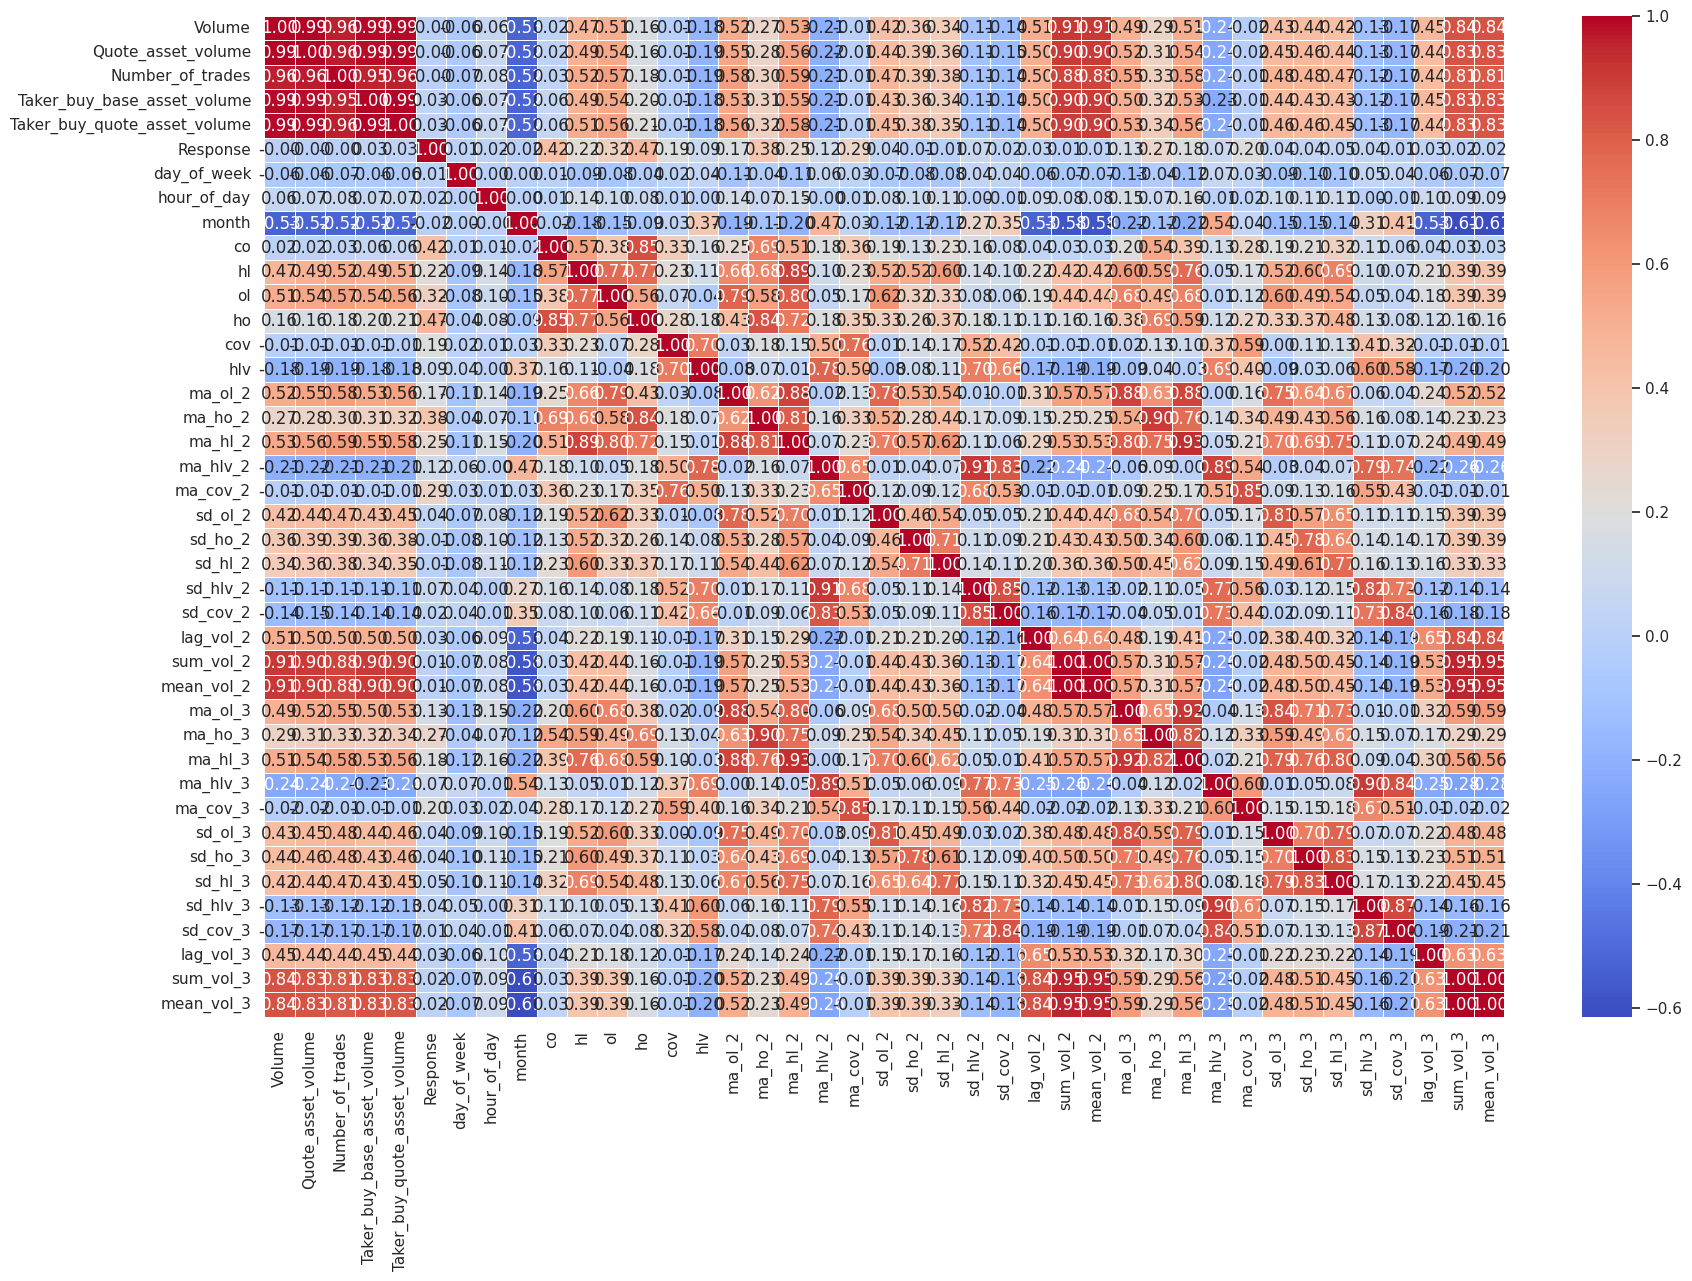

In [ ]:
df_corr = df_filled
correlation_matrix = df_corr.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.title('Matriz de Correlación')
plt.show()

Es evidente que algunas variables tienen alta correlación entre sí tales como:
- 'Open'
- 'High'
- 'Low'
- 'Close'

Así como también:
- 'Volume'
- 'Quote_asset_volume'
- 'Number_of_trades'
- 'Taker_buy_base_volume'
- 'Taker_buy_quote_asset_volume'

# Preprocesamiento

## Identificación de Valores Faltantes

In [ ]:
missing_values_count = df_filled.isnull().sum()
print(missing_values_count)
np.shape(df)

Volume                          0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
co                              0
hl                              0
ol                              0
ho                              0
cov                             0
hlv                             0
ma_ol_2                         0
ma_ho_2                         0
ma_hl_2                         0
ma_hlv_2                        0
ma_cov_2                        0
sd_ol_2                         0
sd_ho_2                         0
sd_hl_2                         0
sd_hlv_2                        0
sd_cov_2                        0
lag_vol_2                       0
sum_vol_2                       0
mean_vol_2                      0
ma_ol_3                         0
ma_ho_3       

(7293, 41)

In [ ]:
new_df = df_filled.copy()

In [ ]:
new_df.shape

(7293, 41)

## División de Datos en Entrenamiento y Prueba

In [ ]:
X = new_df.drop(['Response'], axis=1)
y = new_df['Response']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7293 entries, 2023-01-01 01:00:00 to 2023-10-31 22:00:00
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Volume                        7293 non-null   float64
 1   Quote_asset_volume            7293 non-null   float64
 2   Number_of_trades              7293 non-null   int64  
 3   Taker_buy_base_asset_volume   7293 non-null   float64
 4   Taker_buy_quote_asset_volume  7293 non-null   float64
 5   day_of_week                   7293 non-null   int32  
 6   hour_of_day                   7293 non-null   int32  
 7   month                         7293 non-null   int32  
 8   co                            7293 non-null   float64
 9   hl                            7293 non-null   float64
 10  ol                            7293 non-null   float64
 11  ho                            7293 non-null   float64
 12  cov                       

## Escalado

In [ ]:
X[np.isinf(X)] = 0

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

## Principal Component Analysis

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
cov_matrix = np.cov(X_std, rowvar=False)

In [ ]:
pca = PCA()
principal_components = pca.fit_transform(X_std)

### Varianza Acumulada

In [ ]:
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada por cada componente principal:", explained_variance_ratio_cumsum)

Varianza explicada por cada componente principal: [0.37927583 0.5863104  0.6769174  0.73113524 0.76794706 0.79812429
 0.82342157 0.84829782 0.87209211 0.89047145 0.90545653 0.91778704
 0.92885536 0.93910595 0.94829469 0.95657052 0.96464295 0.97100973
 0.97600556 0.97992041 0.9833723  0.98631412 0.98904449 0.99102969
 0.99289765 0.99431541 0.99553318 0.99670737 0.99764865 0.99838266
 0.99886446 0.99918004 0.99943243 0.99967687 0.99986098 0.999999
 0.99999977 1.         1.         1.        ]


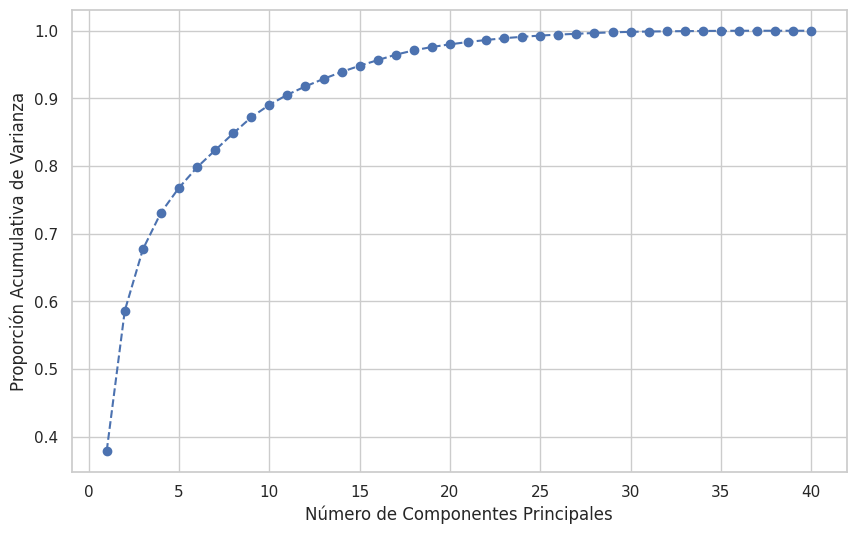

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum)+1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
#plt.title('Proporción Acumulativa de Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulativa de Varianza')
plt.grid(True)
plt.show()

### Selección de Número de Componentes

In [ ]:
n_components = 30
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Modelo de Redes Neuronales

## Función del Modelo

In [ ]:
def model_nn():
  model = tf.keras.Sequential()
  model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(12, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Modelo en Keras

In [ ]:
nnmodel = KerasClassifier(model = model_nn)

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
batchSize = [10, 50, 100]
epochs = [10, 30 ,50]
parameter_grid = dict(batch_size = batchSize, epochs=epochs)

In [ ]:
mygrid = GridSearchCV(estimator = nnmodel, param_grid = parameter_grid, n_jobs = 1, cv = 3)
grid_result = mygrid.fit(principal_components,y)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5945 - loss: 0.6647
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8204 - loss: 0.4199
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8770 - loss: 0.3192
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.2280
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.1711
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.1515
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9566 - loss: 0.1179
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1244
Epoch 9/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9554 - loss: 0.1191
Epoch 10/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9589 - loss: 0.0962
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6093 - loss: 0.6830
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4570
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8617 - loss: 0.3453
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9109 - loss: 0.2475
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.2045
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.1728
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.1574
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1267
Epoch 9/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9537 - loss: 0.1428
Epoch 10/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9590 - loss: 0.1052
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6447 - loss: 0.6639
Epoch 2/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8207 - loss: 0.4137
Epoch 3/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.2913
Epoch 4/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.2509
Epoch 5/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1492
Epoch 6/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.1521
Epoch 7/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1174
Epoch 8/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1012
Epoch 9/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.0866
Epoch 10/10
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9716 - loss: 0.0791
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6159 - loss: 0.6550
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.4312
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.2908
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9183 - loss: 0.2191
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.1923
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9406 - loss: 0.1600
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9483 - loss: 0.1293
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9552 - loss: 0.1170
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9599 - loss: 0.0998
Epoch 10/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1059
Epoch 11/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9640 - loss: 0.0989
Epoch 12/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5951 - loss: 0.7259
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 0.5221
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3663
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8932 - loss: 0.2745
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9134 - loss: 0.2237
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9279 - loss: 0.1807
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9488 - loss: 0.1536
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1293
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9576 - loss: 0.1131
Epoch 10/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1057
Epoch 11/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.0906
Epoch 12/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6319 - loss: 0.6298
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8184 - loss: 0.4072
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.2762
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9224 - loss: 0.2071
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9342 - loss: 0.1859
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1303
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1122
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.0961
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0712
Epoch 10/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9763 - loss: 0.0887
Epoch 11/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9729 - loss: 0.0709
Epoch 12/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6737 - loss: 0.6068
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.3722
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.2761
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.2234
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9242 - loss: 0.1978
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9335 - loss: 0.1638
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1441
Epoch 8/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9552 - loss: 0.1207
Epoch 9/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1150
Epoch 10/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.0953
Epoch 11/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9587 - loss: 0.0985
Epoch 12/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6253 - loss: 0.6623
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8096 - loss: 0.4586
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8635 - loss: 0.3529
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9035 - loss: 0.2493
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9178 - loss: 0.2375
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9375 - loss: 0.1804
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9355 - loss: 0.1743
Epoch 8/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9600 - loss: 0.1356
Epoch 9/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9544 - loss: 0.1353
Epoch 10/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1196
Epoch 11/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9674 - loss: 0.1019
Epoch 12/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5864 - loss: 0.6823
Epoch 2/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8369 - loss: 0.3758
Epoch 3/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8866 - loss: 0.3682
Epoch 4/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9281 - loss: 0.1922
Epoch 5/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.1372
Epoch 6/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.1987
Epoch 7/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9608 - loss: 0.1287
Epoch 8/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 0.0907
Epoch 9/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.0950
Epoch 10/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0738
Epoch 11/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9703 - loss: 0.0751
Epoch 12/50
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5168 - loss: 0.7092
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7269 - loss: 0.5644
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4713
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8238 - loss: 0.4039
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8532 - loss: 0.3452
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9003 - loss: 0.2676
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8995 - loss: 0.2458
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9244 - loss: 0.2000
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9214 - loss: 0.1924
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9270 - loss: 0.1817
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4908 - loss: 0.8474
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6303 - loss: 0.6672
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.5818
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7715 - loss: 0.5289
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.4691
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8226 - loss: 0.4144
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.3969
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.3972
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8781 - loss: 0.2983
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8971 - loss: 0.2742
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6539 - loss: 0.6482
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7532 - loss: 0.5536
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4585
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8236 - loss: 0.4128
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8624 - loss: 0.3255
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.2794
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.2223
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9237 - loss: 0.2036
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9288 - loss: 0.1821
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9362 - loss: 0.1622
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5967 - loss: 0.7098
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7464 - loss: 0.5392
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8124 - loss: 0.4411
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8388 - loss: 0.3751
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8662 - loss: 0.3273
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8786 - loss: 0.3018
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8942 - loss: 0.2717
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9139 - loss: 0.2240
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.2057
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9204 - loss: 0.1916
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.1817
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9417 - loss: 0.1554


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5819 - loss: 0.7065
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7074 - loss: 0.5914
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.5115
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8159 - loss: 0.4263
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.3855
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.3398
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8913 - loss: 0.2754
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8947 - loss: 0.2570
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9138 - loss: 0.2360
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.1931
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9302 - loss: 0.2084
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9274 - loss: 0.1773


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5773 - loss: 0.7292
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7307 - loss: 0.5543
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4663
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8398 - loss: 0.3888
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3348
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.2770
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9002 - loss: 0.2506
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9151 - loss: 0.2605
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9196 - loss: 0.1920
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.1718
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9344 - loss: 0.1564
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.1321


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5711 - loss: 0.7555
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5651
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4748
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4084
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3409
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.3154
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8960 - loss: 0.2691
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.2428
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9144 - loss: 0.2199
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9196 - loss: 0.2071
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9311 - loss: 0.1871
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9344 - loss: 0.1687


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6053 - loss: 0.6630
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 0.5544
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.4873
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4139
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8546 - loss: 0.3578
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3166
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8899 - loss: 0.2779
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8960 - loss: 0.2576
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9112 - loss: 0.2170
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.2075
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9230 - loss: 0.1916
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9364 - loss: 0.1652


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5529 - loss: 0.7313
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6795 - loss: 0.5826
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5036
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4303
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3665
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.2903
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9042 - loss: 0.2550
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9242 - loss: 0.2149
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9325 - loss: 0.1803
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9399 - loss: 0.1603
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1449
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9463 - loss: 0.1340


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5918 - loss: 0.6645
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7136 - loss: 0.5828
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7622 - loss: 0.5150
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4719
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.4088
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8203 - loss: 0.3938
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3417
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.3150
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.2753
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8983 - loss: 0.2536
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5361 - loss: 0.7352
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.6639
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6834 - loss: 0.6201
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7183 - loss: 0.5724
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.5133
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.4792
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4171
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.3866
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.3626
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3193
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5076 - loss: 0.6918
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: 0.6179
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5702
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7803 - loss: 0.4982
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4371
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8389 - loss: 0.3909
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8646 - loss: 0.3399
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.2919
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.2641
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9058 - loss: 0.2371
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5408 - loss: 0.7195
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6578 - loss: 0.6254
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.5698
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.5057
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8055 - loss: 0.4482
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.4184
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3749
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.3474
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3004
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.2879
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8962 - loss: 0.2663
Epoch 12/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2416


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5257 - loss: 0.7401
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - loss: 0.6490
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.5941
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.5310
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7733 - loss: 0.4952
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4510
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.4354
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8459 - loss: 0.3833
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.3671
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3330
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3133
Epoch 12/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.2928


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4424 - loss: 0.7781
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5593 - loss: 0.6880
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.6482
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5870
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7662 - loss: 0.5184
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.4622
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.4046
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.3405
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8805 - loss: 0.3134
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.2729
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8882 - loss: 0.2527
Epoch 12/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.2306


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5422 - loss: 0.7671
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6520 - loss: 0.6277
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.5725
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7600 - loss: 0.5129
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 0.4732
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.4342
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8317 - loss: 0.4000
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.3611
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.3393
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3111
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.2672
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8871 - loss: 0.2519


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4953 - loss: 0.7704
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6310 - loss: 0.6434
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.5929
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.5211
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.4820
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8263 - loss: 0.4165
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3916
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3607
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3270
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3004
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8916 - loss: 0.2721
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8976 - loss: 0.2598


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5062 - loss: 0.7636
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.6394
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5868
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7667 - loss: 0.5257
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4815
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.4115
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8541 - loss: 0.3725
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3336
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.3167
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.2732
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9104 - loss: 0.2659
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - loss: 0.2214


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6065 - loss: 0.6809
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.5207
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4118
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3526
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.2916
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.2339
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2083
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9298 - loss: 0.1772
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9413 - loss: 0.1577
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9450 - loss: 0.1452
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9533 - loss: 0.1317
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.976142 using {'batch_size': 50, 'epochs': 50}


In [ ]:
def model_nn(optimizer='SGD'):
  model = tf.keras.Sequential()
  model.add(Dense(18, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.3),) #técnica de regularización, Goeff Hinto
  model.add(Dense(9, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
nnmodel = KerasClassifier(model = model_nn, batch_size = 50, epochs = 50)

In [ ]:
optimizer = ['SGD','Adam', 'Adadelta']
param = dict(optimizer=optimizer)

In [ ]:
grid1 = GridSearchCV(estimator = nnmodel, param_grid=param, n_jobs=-1, cv=3)
grid_result1 = grid1.fit(principal_components,y)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5061 - loss: 0.7768
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 0.6798
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.6356
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6687 - loss: 0.6252
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6855 - loss: 0.5972
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7109 - loss: 0.5754
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7453 - loss: 0.5436
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7433 - loss: 0.5303
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7505 - loss: 0.5216
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.5041
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7651 - loss: 0.5022
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

In [ ]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: 0.898396 using {'optimizer': 'Adadelta'}


## Modelo Final

In [ ]:
def model_nnnnn():
  model = tf.keras.Sequential()
  model.add(Dense(39, input_dim=X_train_pca.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(15, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
  return model

In [ ]:
nnnnnmodel = KerasClassifier(model = model_nnnnn, batch_size = 50, epochs = 50)

In [ ]:
nnnnnmodel.fit(X_train_pca,y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4948 - loss: 713981.7500
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4987 - loss: 689557.2500
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5087 - loss: 673416.4375
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4925 - loss: 715657.0625
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 684414.4375
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5063 - loss: 730032.9375
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 656020.2500
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4929 - loss: 694822.3750
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 667463.1250
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 648099.3750
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 636893.00

KerasClassifier(
	model=<function model_nnnnn at 0x7f7018bbba30>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

## Predicción

In [ ]:
y_pred = nnnnnmodel.predict(X_test_pca)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print('Accuracy of neural network classifier on train set: {:.2f}'.format(nnnnnmodel.score(X_train_pca, y_train)))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy of neural network classifier on train set: 0.50


In [ ]:
print('Accuracy of neural network classifier on test set: {:.2f}'.format(nnnnnmodel.score(X_test_pca, y_test)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy of neural network classifier on test set: 0.50


In [ ]:
print('Precision of neural network classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Precision of neural network classifier on test set: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### Métricas

In [ ]:
accuracy_nn = accuracy_score(y_test, y_pred)
precision_nn = precision_score(y_test, y_pred)
recall_nn = recall_score(y_test, y_pred)
f1_score_nn = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy_nn, precision_nn, recall_nn, f1_score_nn, conf_matrix)

0.498971898560658 0.0 0.0 0.0 [[728   0]
 [731   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
y_scores = nnnnnmodel.predict_proba(X_test_pca)[:, 1]

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_scores)
auc_roc_nn = roc_auc_score(y_test, y_scores)

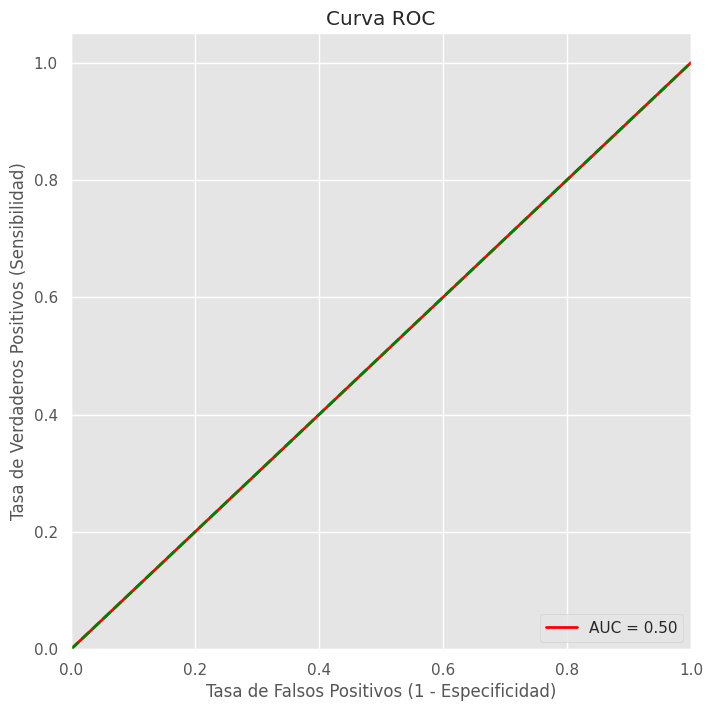

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'AUC = {auc_roc_nn:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Modelo Regresión Logística

## Modelo en SKLearn

In [ ]:
lrmodel = LogisticRegression()

## Definición de Parámetros

In [ ]:
solvers = ['newton-cg','liblinear','lbfgs']
penalty = ['l2','l1', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=lrmodel, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(principal_components, y)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call la

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.980666 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## Modelo Final

In [ ]:
logreg = LogisticRegression(solver = 'liblinear',
                            penalty='l2',
                            C=100,
                            multi_class='ovr')
logreg.fit(X_train_pca, y_train)

LogisticRegression(C=100, multi_class='ovr', solver='liblinear')

## Predicción

In [ ]:
y_pred_lr = logreg.predict(X_test_pca)

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train_pca, y_train)))

Accuracy of logistic regression classifier on train set: 0.79


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [ ]:
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_lr)))


Precision of logistic regression classifier on test set: 0.81


### Métricas

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(accuracy_lr, precision_lr, recall_lr, f1_score_lr, conf_matrix)

0.7861549006168609 0.8067349926793558 0.7537619699042407 0.7793493635077794 [[596 132]
 [180 551]]


In [ ]:
y_scores_lr = logreg.predict_proba(X_test_pca)[:, 1]

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_scores_lr)
auc_roc_lr = roc_auc_score(y_test, y_scores_lr)

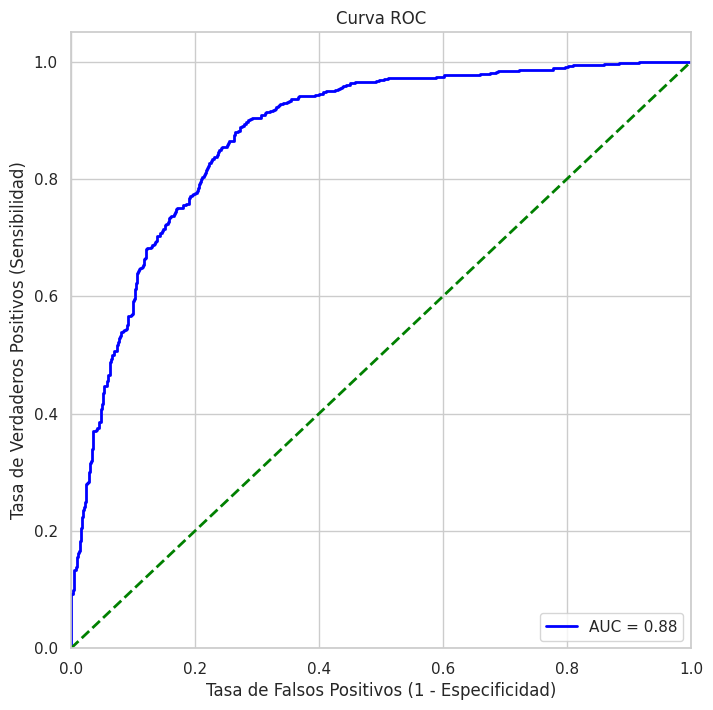

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {auc_roc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Comparación de Modelos

## Tabla de Resultados

In [ ]:
resultados_final = {'Modelo': ['Neural Network','Logistic Regression'],
              'Accuracy': [accuracy_nn, accuracy_lr],
              'Precision': [precision_nn, precision_lr],
              'Recall': [recall_nn, recall_lr],
              'F1 Score': [f1_score_nn, f1_score_lr],
              'AUC-ROC': [auc_roc_nn, auc_roc_lr]}
resultados = pd.DataFrame(data=resultados_final)
print(resultados)

                Modelo  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0       Neural Network  0.512380   0.502447  0.861538  0.634724  0.534139
1  Logistic Regression  0.543329   0.530106  0.627972  0.574904  0.554087


## Curvas ROC y AUC

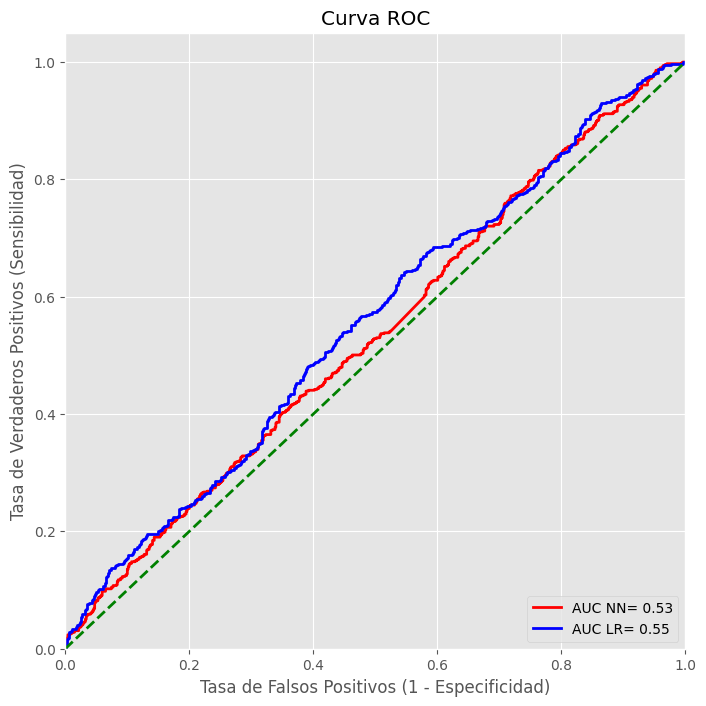

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'AUC NN= {auc_roc_nn:.2f}')
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC LR= {auc_roc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Reducción de Multicolinealidad bajo criterio propuesto de correlación

## Correlación

<ipython-input-82-a562786f0b5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


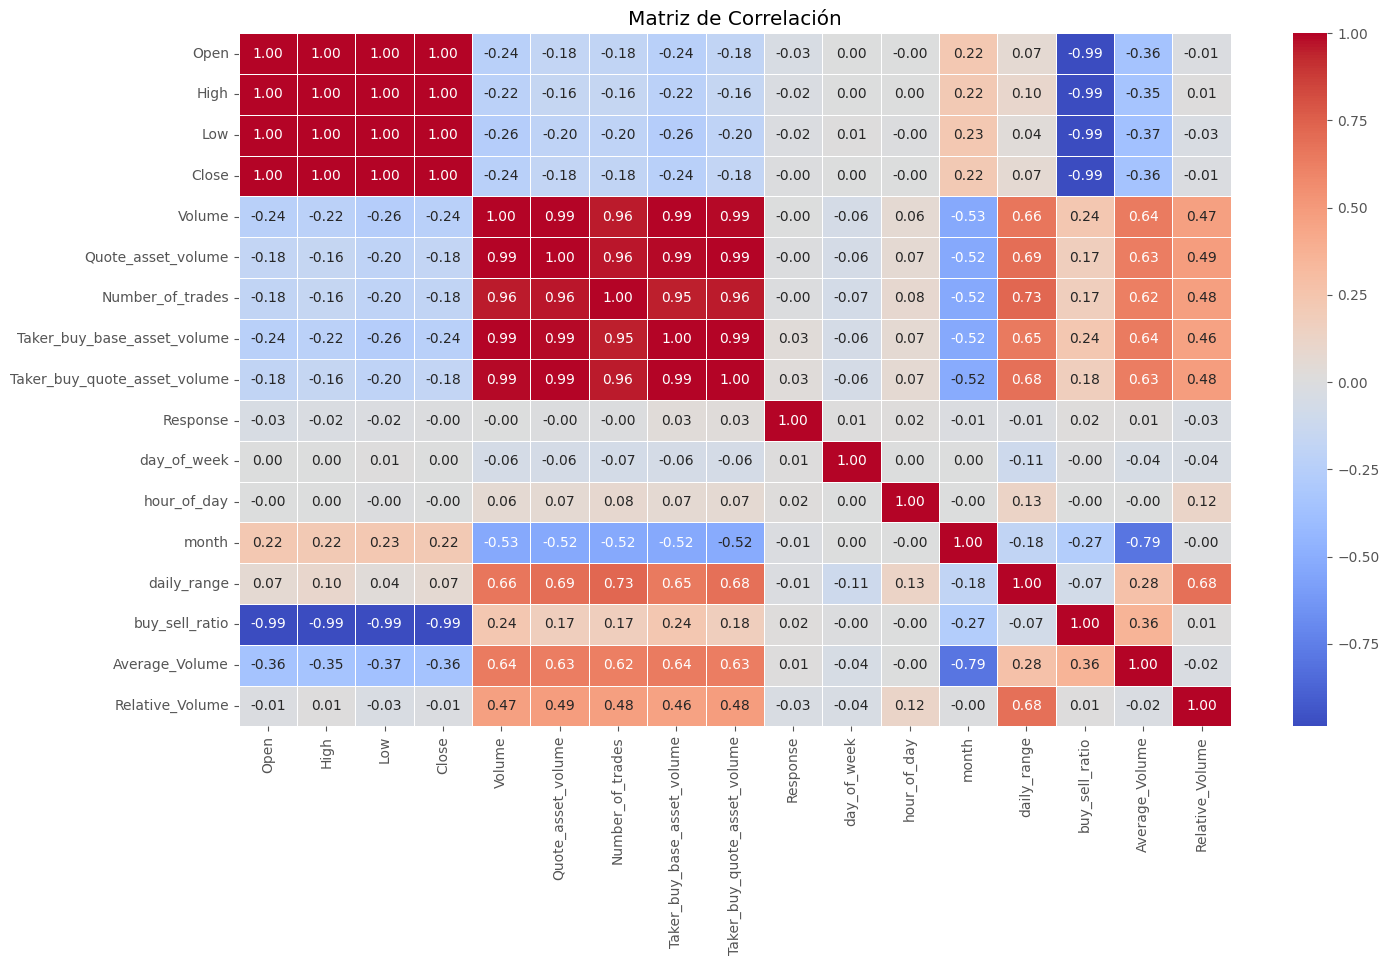

In [ ]:
df_corr = df.drop('Ignore', axis = 1)
correlation_matrix = df_corr.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Se eliminarán las siguientes variables:
- 'Open'
- 'High'
- 'Low'
- 'Quote_asset_volume'
- 'Number_of_trades'
- 'Taker_buy_base_asset_volume'
- 'Taker_buy_quote_asset_bolume'

Por la alta correlación que existe entre ellas, con el fin de eliminar la multicolinealidad y basándonos que existe una alta correlación por tener información similar. Con esto se espera simplificar el modelo, tener mayor interpretabilidad y no repetir información.

## Preprocesamiento

### División de Datos

In [ ]:
X_2 = new_df.drop(['Response','Close_time','Ignore','Open','High','Low',
                   'Quote_asset_volume','Number_of_trades',
                   'Taker_buy_base_asset_volume',
                   'Taker_buy_quote_asset_volume'], axis=1)
y_2 = new_df['Response']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.2,random_state = 1)

In [ ]:
feature_names = ['Close','Volume','day_of_week','hour_of_day','month','price_diff','daily_range','buy_sell_ratio']

### Escalado

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_2_minmax = min_max_scaler.fit_transform(X_2)
X_2_train_minmax = min_max_scaler.fit_transform(X_2_train)
X_2_test_minmax = min_max_scaler.fit_transform(X_2_test)

# Nuevo Modelo de Redes Neuronales

## Función del Modelo

In [ ]:
def model_nn2():
  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Modelo en Keras

In [ ]:
nn2model = KerasClassifier(model = model_nn2)

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
batchSize = [10, 50, 100]
epochs = [10, 30 ,50]
parameter_grid2 = dict(batch_size = batchSize, epochs=epochs)

In [ ]:
mygrid = GridSearchCV(estimator = nnmodel, param_grid = parameter_grid2, n_jobs = 1, cv = 3)
grid_result2 = mygrid.fit(X_std,y)

Epoch 1/10
485/485 [==============================] - 2s 2ms/step - loss: 0.7231 - accuracy: 0.4878
Epoch 2/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.5134
Epoch 3/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.5060
Epoch 4/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5025
Epoch 5/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5087
Epoch 6/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4977
Epoch 7/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5056
Epoch 8/10
485/485 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5132
Epoch 9/10
485/485 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.5151
Epoch 10/10
243/243 [==============================] - 0s 1ms/step
Epoch 1/10
485/485 [=============

In [ ]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.512792 using {'batch_size': 100, 'epochs': 30}


In [ ]:
def model_nn2(optimizer='SGD'):
  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
nn2model = KerasClassifier(model = model_nn2, batch_size = 100, epochs = 30)

In [ ]:
optimizer = ['SGD','Adam', 'Adadelta']
param2 = dict(optimizer=optimizer)

In [ ]:
grid2 = GridSearchCV(estimator = nn2model, param_grid=param2, n_jobs=-1, cv=3)
grid_result3 = grid2.fit(X_std,y)

ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)



In [ ]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.989578 using {'optimizer': 'SGD'}


## Modelo Final

In [ ]:
def model_nnn2():
  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [ ]:
nnn2model = KerasClassifier(model = model_nnn2, batch_size = 100, epochs = 30)

In [ ]:
nnn2model.fit(X_2_train_minmax,y_train)

Epoch 1/30
59/59 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.5083
Epoch 2/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4995
Epoch 3/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4972
Epoch 4/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5036
Epoch 5/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5024
Epoch 6/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 7/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5081
Epoch 8/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5074
Epoch 9/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 10/30
59/59 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4954
Epoch 11/30
59/59 [

KerasClassifier(
	model=<function model_nnn2 at 0x78d4b5746200>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
)

## Predicción

In [ ]:
y_pred2 = nnn2model.predict(X_2_test_minmax)

15/15 [==============================] - 0s 2ms/step


In [ ]:
print('Accuracy of neural network classifier on train set: {:.2f}'.format(nnn2model.score(X_2_train_minmax, y_train)))

59/59 [==============================] - 0s 2ms/step
Accuracy of neural network classifier on train set: 0.52


In [ ]:
print('Accuracy of neural network classifier on test set: {:.2f}'.format(nnn2model.score(X_2_test_minmax, y_test)))

15/15 [==============================] - 0s 2ms/step
Accuracy of neural network classifier on test set: 0.50


In [ ]:
print('Precision of neural network classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred2)))

Precision of neural network classifier on test set: 0.49


### Métricas

In [ ]:
accuracy_nn2 = accuracy_score(y_test, y_pred2)
precision_nn2 = precision_score(y_test, y_pred2)
recall_nn2 = recall_score(y_test, y_pred2)
f1_score_nn2 = f1_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(accuracy_nn2, precision_nn2, recall_nn2, f1_score_nn2, conf_matrix2)

0.4986244841815681 0.4893292682926829 0.4489510489510489 0.4682713347921226 [[404 335]
 [394 321]]


In [ ]:
y_scores2 = nnn2model.predict_proba(X_2_test_minmax)[:, 1]

15/15 [==============================] - 0s 2ms/step


In [ ]:
fpr_nn2, tpr_nn2, thresholds_nn2 = roc_curve(y_test, y_scores2)
auc_roc_nn2 = roc_auc_score(y_test, y_scores2)

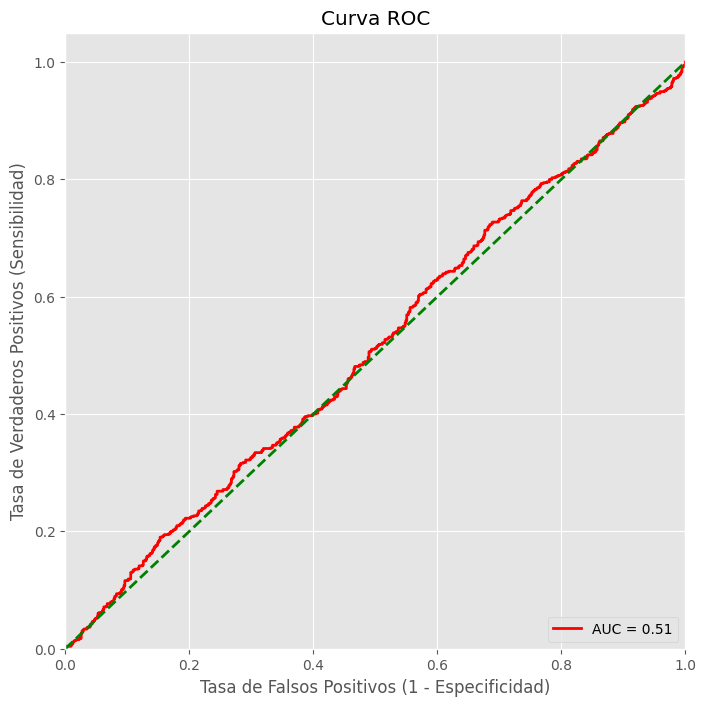

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn2, tpr_nn2, color='red', lw=2, label=f'AUC = {auc_roc_nn2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Nuevo Modelo de Regresión Logística

## Modelo en SKLearn

In [ ]:
lrmodel2 = LogisticRegression()

## Definición de Hiperparámetros

In [ ]:
solvers = ['newton-cg','liblinear','lbfgs']
penalty = ['l2','l1', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
grid2 = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search2 = GridSearchCV(estimator=lrmodel, param_grid=grid2, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(X_std, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [ ]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']

Best: 0.989545 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


## Modelo Final

In [ ]:
logreg2 = LogisticRegression(solver = 'liblinear', penalty='l1', C=1.0)
logreg2.fit(X_2_train_minmax, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

## Predicción

In [ ]:
y_pred_lr2 = logreg2.predict(X_2_test_minmax)

In [ ]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg2.score(X_2_train_minmax, y_train)))

Accuracy of logistic regression classifier on train set: 0.56


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_2_test_minmax, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [ ]:
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_lr2)))

Precision of logistic regression classifier on test set: 0.52


### Métricas

In [ ]:
accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
precision_lr2 = precision_score(y_test, y_pred_lr2)
recall_lr2 = recall_score(y_test, y_pred_lr2)
f1_score_lr2 = f1_score(y_test, y_pred_lr2)
conf_matrix2 = confusion_matrix(y_test, y_pred_lr)
print(accuracy_lr2, precision_lr2, recall_lr2, f1_score_lr2, conf_matrix2)

0.5233837689133425 0.5229166666666667 0.35104895104895106 0.42008368200836826 [[537 202]
 [502 213]]


In [ ]:
y_scores_lr2 = logreg2.predict_proba(X_2_test_minmax)[:, 1]

In [ ]:
fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(y_test, y_scores_lr2)
auc_roc_lr2 = roc_auc_score(y_test, y_scores_lr2)

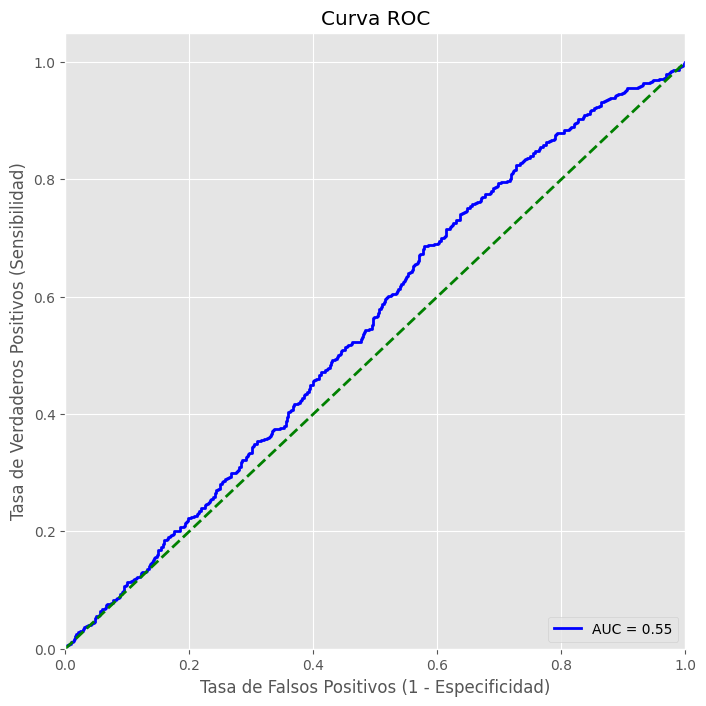

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr2, tpr_lr2, color='blue', lw=2, label=f'AUC = {auc_roc_lr2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Nueva Comparación de Resultados

## Nueva Tabla de Resultados

In [ ]:
resultados_final2 = {'Modelo': ['Neural Network V2','Logistic Regression V2'],
              'Accuracy': [accuracy_nn2, accuracy_lr2],
              'Precision': [precision_nn2, precision_lr2],
              'Recall': [recall_nn2, recall_lr2],
              'F1 Score': [f1_score_nn2, f1_score_lr2],
              'AUC-ROC': [auc_roc_nn2, auc_roc_lr2]}
resulta2 = pd.DataFrame(data=resultados_final2)
print(resulta2)

                   Modelo  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0       Neural Network V2  0.498624   0.489329  0.448951  0.468271  0.511803
1  Logistic Regression V2  0.523384   0.522917  0.351049  0.420084  0.549134


## Nuevas Curvas ROC y AUC

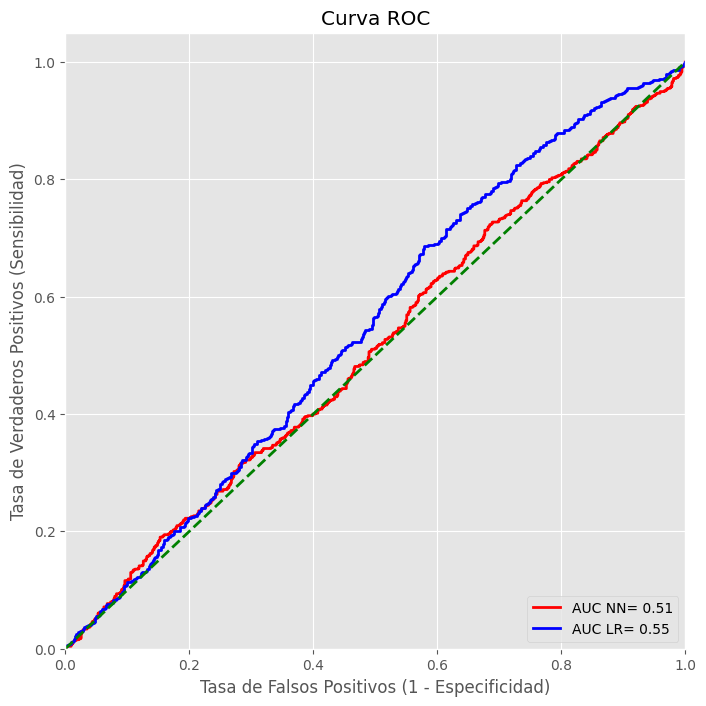

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn2, tpr_nn2, color='red', lw=2, label=f'AUC NN= {auc_roc_nn2:.2f}')
plt.plot(fpr_lr2, tpr_lr2, color='blue', lw=2, label=f'AUC LR= {auc_roc_lr2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Importancia de los Predictores

## Importancia por Permutación

In [ ]:
perm_importance = permutation_importance(nnn2model, X_2_test_minmax, y_test)

15/15 [==============================] - 0s 2ms/step


In [ ]:
importances = perm_importance.importances_mean
std_devs = perm_importance.importances_std

In [ ]:
feature_importance_nn = pd.DataFrame({'Feature':feature_names, 'Importance': importances, 'Std Dev': std_devs})

ValueError: All arrays must be of the same length

In [ ]:
print(feature_importance_nn.sort_values(by='Importance', ascending=False))

In [ ]:
df2 = pd.read_excel(ruta+"datos_klines_newtest.xlsx")

In [ ]:
df2.columns = ['Open_time','Open','High','Low','Close',
                'Volume','Close_time','Quote_asset_volume',
                'Number_of_trades','Taker_buy_base_asset_volume',
                'Taker_buy_quote_asset_volume','Ignore','Response']

# MLP

In [ ]:
mlp = MLPClassifier(random_state=1)

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [50, 100, 200],
    'learning_rate': ['constant','adaptive']
}

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [50, 100, 200],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Mejores hiperparámetros:", best_params)
print("Precisión en conjunto de prueba:", accuracy)

Mejores hiperparámetros: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 50, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Precisión en conjunto de prueba: 0.6387936943111721


In [ ]:
param_range = [100,0]
train_scores, test_scores = validation_curve(
    mlp, X_train_pca, y_train, param_name='hidden_layer_sizes', param_range=(100,50), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

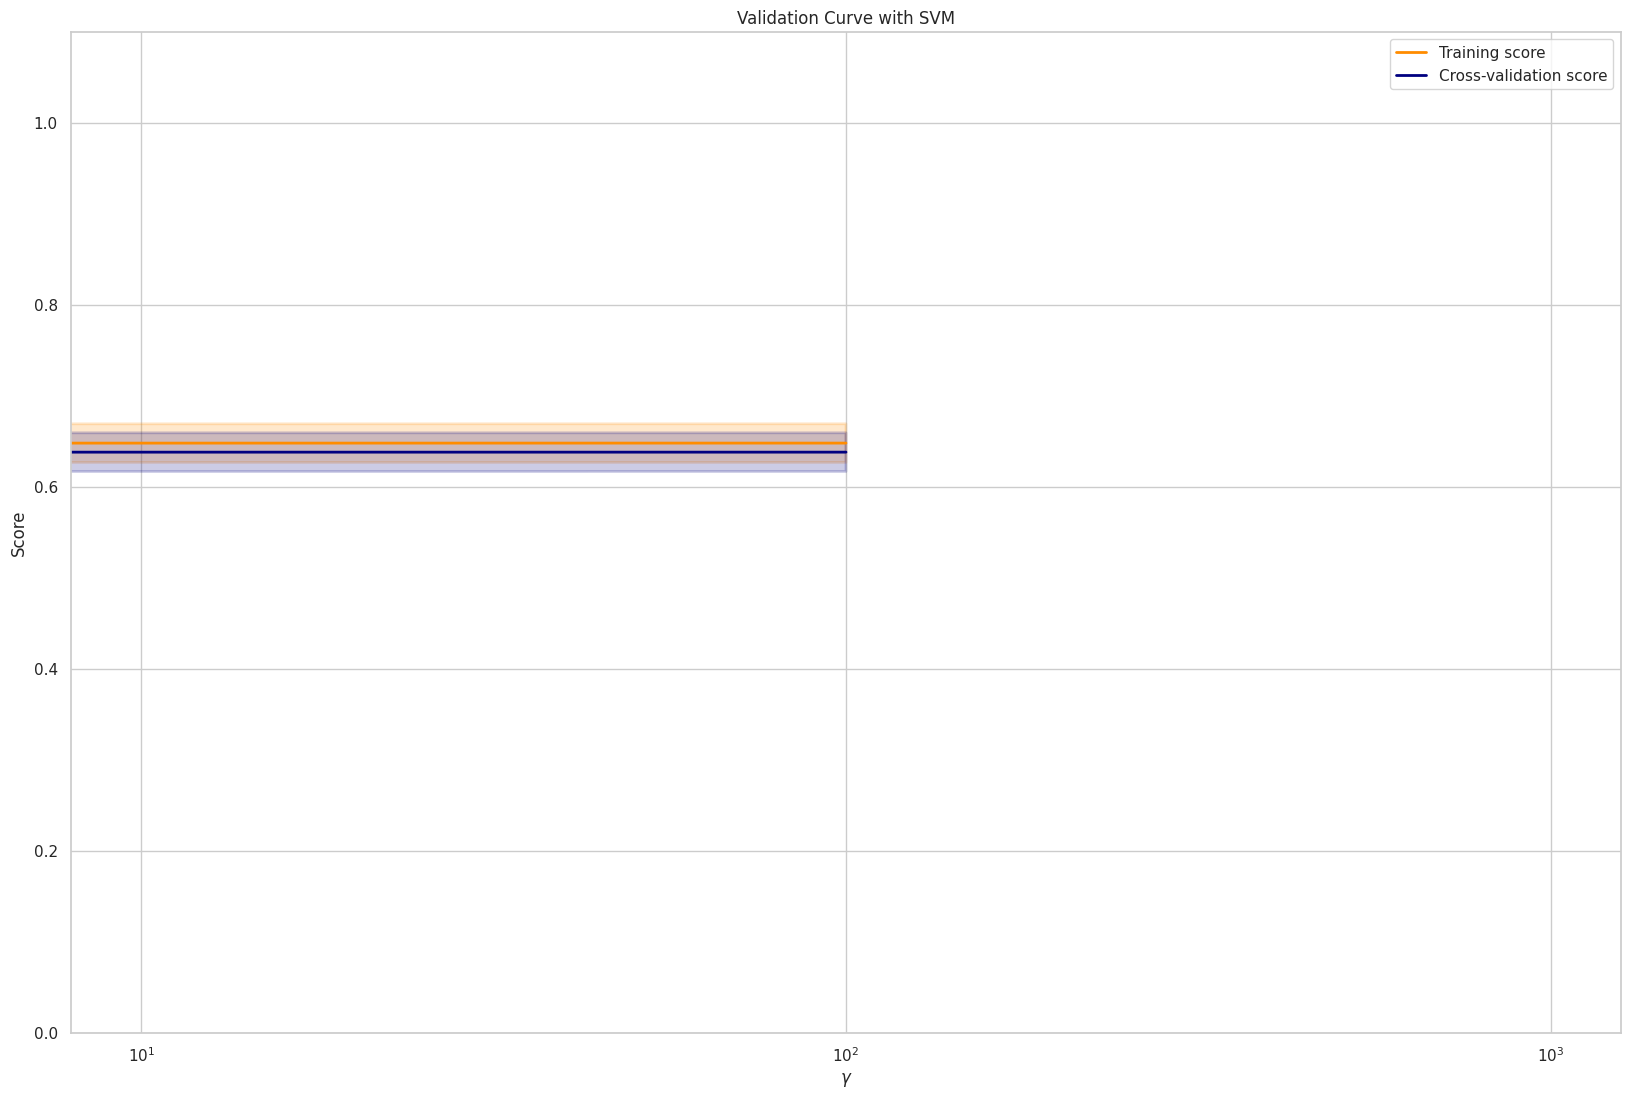

In [ ]:
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

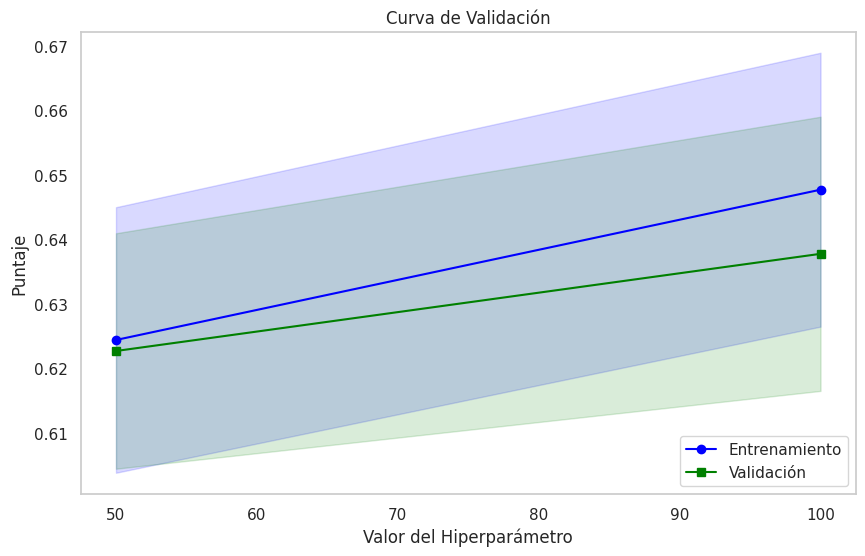

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot((100,50), train_mean, color='blue', marker='o', label='Entrenamiento')
plt.fill_between((100,50), train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot((100,50), test_mean, color='green', marker='s', label='Validación')
plt.fill_between((100,50), test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Valor del Hiperparámetro')
plt.ylabel('Puntaje')
plt.legend(loc='lower right')
plt.title('Curva de Validación')
plt.grid()
plt.show()

## Modelo Final

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50),
                    activation='relu',
                    solver='adam',
                    alpha=0.0001,
                    learning_rate='adaptive',
                    batch_size=50,
                    early_stopping=True,
                    random_state=1)


In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=50, early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate='adaptive', random_state=1)

## Predicción

In [ ]:
y_pred = mlp.predict(X_test)

### Métricas

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en conjunto de prueba:", accuracy)

Precisión en conjunto de prueba: 0.6401644962302947


In [ ]:
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_score_mlp = f1_score(y_test, y_pred)
conf_matrixmlp = confusion_matrix(y_test, y_pred)
print(accuracy_mlp, precision_mlp, recall_mlp, f1_score_mlp, conf_matrixmlp)

0.6401644962302947 0.6694078947368421 0.5567715458276333 0.607916355489171 [[527 201]
 [324 407]]


In [ ]:
y_scoresmlp =mlp.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, thresholdsmlp = roc_curve(y_test, y_scoresmlp)
auc_roc_mlp = roc_auc_score(y_test, y_scoresmlp)


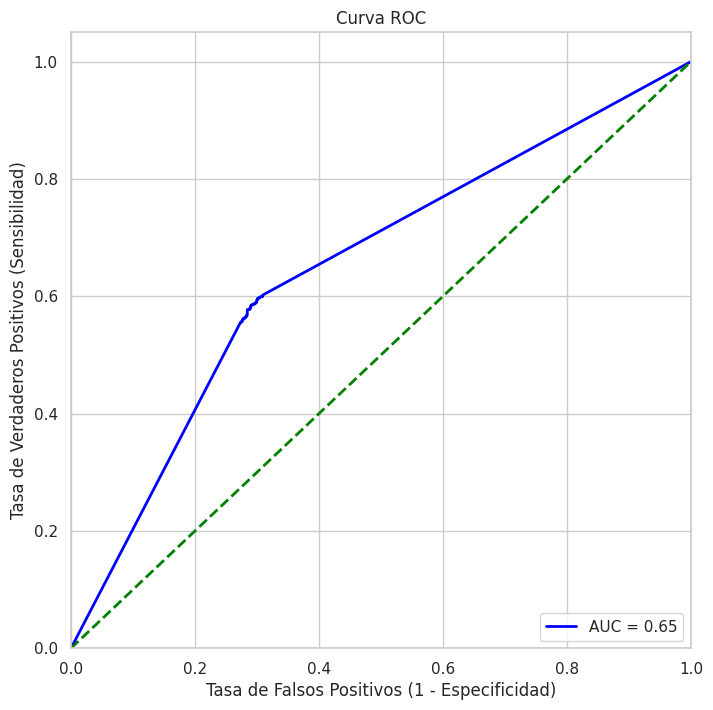

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'AUC = {auc_roc_mlp:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()